# 01 - First Exploration

First exploration of the data.

## Preliminaires 

### System 

In [1]:
cd ../

/home/alex/tmp/Global-Biodiversity-Score


In [2]:
pwd

'/home/alex/tmp/Global-Biodiversity-Score'

### Imports

In [3]:
import os, sys, logging

from dataclasses import dataclass

In [4]:
from IPython.display import display, HTML

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import missingno as msno

In [7]:
# from gbs.etl.extract import Extract

### Data

In [8]:
!tree -L 1 ./

./
├── CHANGELOG.md
├── data
├── gbs
├── LICENSE
├── notebooks
├── poetry.lock
├── pyproject.toml
├── README.md
├── ressources
└── tests

6 directories, 5 files


In [9]:
!tree -L 3 data/

data/
├── final
│   └── final.csv
├── source
│   ├── country_specs
│   │   └── country_specs.csv
│   ├── crops
│   │   └── crops.csv
│   ├── gdp
│   │   ├── API_NY.GDP.PCAP.CD_DS2_en_csv_v2_6298251.csv
│   │   ├── gdp.zip
│   │   ├── Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_6298251.csv
│   │   └── Metadata_Indicator_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_6298251.csv
│   ├── population
│   │   ├── API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv
│   │   ├── Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv
│   │   ├── Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv
│   │   └── population.zip
│   └── production
│       ├── data_normalized.csv
│       ├── production_crops_livestock_e_areacodes.csv
│       ├── production_crops_livestock_e_flags.csv
│       ├── production_crops_livestock_e_itemcodes.csv
│       └── production.zip
└── tmp

9 directories, 16 files


In [10]:
data_dir = "./data/source/"

In [11]:
crops = pd.read_csv(os.path.join(data_dir, "crops/crops.csv"))
crops.head()

,id,globio_country_code,item_name,item_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
0,1,40,Wheat,15,0.000008,0.001838,0,0.000429,0,0.000573,...,0.000009,0.000009,1.684354e-08,1.710999e-08,1.190762e-07,1.271384e-07,0.0,0.0,0.000028,0.0
1,2,40,Barley,44,0.000007,0.001591,0,0.000372,0,0.000496,...,0.000008,0.000008,1.457340e-08,1.480394e-08,1.030273e-07,1.100030e-07,0.0,0.0,0.000024,0.0
2,3,40,Maize,56,0.000004,0.000904,0,0.000211,0,0.000282,...,0.000004,0.000004,8.279003e-09,8.409969e-09,5.852881e-08,6.249160e-08,0.0,0.0,0.000014,0.0
3,4,40,Rye,71,0.000010,0.002392,0,0.000559,0,0.000746,...,0.000011,0.000012,2.191576e-08,2.226245e-08,1.549345e-07,1.654246e-07,0.0,0.0,0.000036,0.0
4,5,40,Oats,75,0.000012,0.002715,0,0.000634,0,0.000847,...,0.000013,0.000013,2.487516e-08,2.526866e-08,1.758561e-07,1.877628e-07,0.0,0.0,0.000041,0.0


In [12]:
country_specs = pd.read_csv(
    os.path.join(data_dir, "country_specs/country_specs.csv")
)
country_specs.head()

,globio_country_name,globio_country_code,image_region_code,USS30_region_name,alpha_2_code,alpha_3_code,FAO_country_code,FAO_country_name,aquastat_country_name,BGS_country_name,...,exiobase_region_alpha_code,exiobase_region_alpha_code_2,exiobase_region_group_code,exiobase_region_group_name,exiobase_region_id,is_EU27,is_south_america,official_name_in_english,FAO_FRA_country_name,FAO_country_code_terrestrial_irrigation
0,Afghanistan,4,18,Rest S Asia,AF,AFG,2.0,Afghanistan,Afghanistan,Afghanistan,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,Islamic State of Afghanistan,Afghanistan,2.0
1,Albania,8,12,C.Europe,AL,ALB,3.0,Albania,Albania,Albania,...,WWE,WE,11.0,Rest of World,47.0,NaN,NaN,Republic of Albania,Albania (Desk study),3.0
2,Algeria,12,7,N.Africa,DZ,DZA,4.0,Algeria,Algeria,Algeria,...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,People's Democratic Republic of Algeria,Algeria,4.0
3,American Samoa,16,24,Oceania,AS,ASM,5.0,American Samoa,American Samoa,American Samoa,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,American Samoa,American Samoa,5.0
4,Andorra,20,11,W.Europe,AD,AND,NaN,Andorra,Andorra,Andorra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principality of Andorra,Andorra,6.0


In [13]:
_path = "./data/source/production/"

fn_list = [
    os.path.join(_path, f) for f in os.listdir(_path) if f.endswith(".csv")
]
fn_list

['./data/source/production/production_crops_livestock_e_flags.csv',
 './data/source/production/production_crops_livestock_e_itemcodes.csv',
 './data/source/production/data_normalized.csv',
 './data/source/production/production_crops_livestock_e_areacodes.csv']

In [14]:
@dataclass
class Production:
    """Production data for a crop in a country in a year"""

    areacodes = pd.read_csv(
        os.path.join(_path, "production_crops_livestock_e_areacodes.csv"),
    )
    data_normalized = pd.read_csv(os.path.join(_path, "data_normalized.csv"))
    flags = pd.read_csv(
        os.path.join(_path, "production_crops_livestock_e_flags.csv"),
    )
    itemcodes = pd.read_csv(
        os.path.join(_path, "production_crops_livestock_e_itemcodes.csv"),
    )

/tmp/ipykernel_266285/1443814896.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_normalized = pd.read_csv(os.path.join(_path, "data_normalized.csv"))


## Exploration 

### Country Specs 

#### Display

In [15]:
country_specs.head(10)

,globio_country_name,globio_country_code,image_region_code,USS30_region_name,alpha_2_code,alpha_3_code,FAO_country_code,FAO_country_name,aquastat_country_name,BGS_country_name,...,exiobase_region_alpha_code,exiobase_region_alpha_code_2,exiobase_region_group_code,exiobase_region_group_name,exiobase_region_id,is_EU27,is_south_america,official_name_in_english,FAO_FRA_country_name,FAO_country_code_terrestrial_irrigation
0,Afghanistan,4,18,Rest S Asia,AF,AFG,2.0,Afghanistan,Afghanistan,Afghanistan,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,Islamic State of Afghanistan,Afghanistan,2.0
1,Albania,8,12,C.Europe,AL,ALB,3.0,Albania,Albania,Albania,...,WWE,WE,11.0,Rest of World,47.0,NaN,NaN,Republic of Albania,Albania (Desk study),3.0
2,Algeria,12,7,N.Africa,DZ,DZA,4.0,Algeria,Algeria,Algeria,...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,People's Democratic Republic of Algeria,Algeria,4.0
3,American Samoa,16,24,Oceania,AS,ASM,5.0,American Samoa,American Samoa,American Samoa,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,American Samoa,American Samoa,5.0
4,Andorra,20,11,W.Europe,AD,AND,NaN,Andorra,Andorra,Andorra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Principality of Andorra,Andorra,6.0
5,Angola,24,10,Rest S Africa,AO,AGO,7.0,Angola,Angola,Angola,...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,Republic of Angola,Angola,7.0
6,Anguilla,660,4,Rest C.Am.,AI,AIA,258.0,Anguilla,Anguilla,Anguilla,...,NaN,NaN,NaN,Rest of World,46.0,NaN,NaN,Anguilla,Anguilla (Desk study),258.0
7,Antarctica,10,26,NaN,AQ,ATA,NaN,Antarctica,Antarctica,Antarctica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antarctica,NaN,NaN
8,Antigua and Barbuda,28,4,Rest C.Am.,AG,ATG,8.0,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,...,WWL,WL,11.0,Rest of World,46.0,NaN,NaN,Antigua and Barbuda,Antigua and Barbuda (Desk study),8.0
9,Argentina,32,6,Rest S.Am.,AR,ARG,9.0,Argentina,Argentina,Argentina,...,WWL,WL,11.0,Rest of World,46.0,NaN,x,Argentine Republic,Argentina,9.0


In [16]:
country_specs.tail(10)

,globio_country_name,globio_country_code,image_region_code,USS30_region_name,alpha_2_code,alpha_3_code,FAO_country_code,FAO_country_name,aquastat_country_name,BGS_country_name,...,exiobase_region_alpha_code,exiobase_region_alpha_code_2,exiobase_region_group_code,exiobase_region_group_name,exiobase_region_id,is_EU27,is_south_america,official_name_in_english,FAO_FRA_country_name,FAO_country_code_terrestrial_irrigation
231,Vanuatu,548,24,Oceania,VU,VUT,155.0,Vanuatu,Vanuatu,Vanuatu,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,Republic of Vanuatu,Vanuatu,155.0
232,Venezuela,862,6,Rest S.Am.,VE,VEN,236.0,Venezuela (Bolivarian Republic of),Venezuela (Bolivarian Republic of),Venezuela,...,WWL,WL,11.0,Rest of World,46.0,NaN,x,Republic of Venezuela,Venezuela (Bolivarian Republic of),236.0
233,Viet Nam,704,21,SE.Asia,VN,VNM,237.0,Viet Nam,Viet Nam,Vietnam,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,Socialist Republic of Viet Nam,Viet Nam,237.0
234,"Virgin Islands, British",92,4,Rest C.Am.,VG,VGB,239.0,British Virgin Islands,British Virgin Islands,"Virgin Islands, British",...,WWL,WL,11.0,Rest of World,46.0,NaN,NaN,British Virgin Islands,British Virgin Islands (Desk study),239.0
235,"Virgin Islands, U.S.",850,4,Rest C.Am.,VI,VIR,240.0,United States Virgin Islands,United States Virgin Islands,"Virgin Islands, U.S.",...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,Virgin Islands of the United States,United States Virgin Islands,240.0
236,Wallis and Futuna,876,24,Oceania,WF,WLF,243.0,Wallis and Futuna Islands,Wallis and Futuna Islands,Wallis and Futuna,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,Wallis and Futuna,Wallis and Futuna Islands (Desk study),243.0
237,Western Sahara,732,7,N.Africa,EH,ESH,205.0,Western Sahara,Western Sahara,Western Sahara,...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,Western Sahara,Western Sahara (Desk study),205.0
238,Yemen,887,17,M.East,YE,YEM,249.0,Yemen,Yemen,Yemen,...,WWM,WM,11.0,Rest of World,49.0,NaN,NaN,Republic of Yemen,Yemen,249.0
239,Zambia,894,10,Rest S Africa,ZM,ZMB,251.0,Zambia,Zambia,Zambia,...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,Republic of Zambia,Zambia,251.0
240,Zimbabwe,716,10,Rest S Africa,ZW,ZWE,181.0,Zimbabwe,Zimbabwe,Zimbabwe,...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,Republic of Zimbabwe,Zimbabwe,181.0


In [17]:
country_specs.sample(10)

,globio_country_name,globio_country_code,image_region_code,USS30_region_name,alpha_2_code,alpha_3_code,FAO_country_code,FAO_country_name,aquastat_country_name,BGS_country_name,...,exiobase_region_alpha_code,exiobase_region_alpha_code_2,exiobase_region_group_code,exiobase_region_group_name,exiobase_region_id,is_EU27,is_south_america,official_name_in_english,FAO_FRA_country_name,FAO_country_code_terrestrial_irrigation
162,Occupied Palestinian Territory,376,17,M.East,NaN,NaN,299.0,Occupied Palestinian Territory,Occupied Palestinian Territory,Occupied Palestinian Territory,...,WWM,WM,11.0,Rest of World,49.0,NaN,NaN,Occupied Palestinian Territory,Palestine (Desk study),299.0
104,Israel,376,17,M.East,IL,ISR,105.0,Israel,Israel,Israel,...,WWM,WM,11.0,Rest of World,49.0,NaN,NaN,State of Israel,Israel,105.0
158,Niue,570,24,Oceania,NU,NIU,160.0,Niue,Niue,Niue,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,Niue,Niue,160.0
235,"Virgin Islands, U.S.",850,4,Rest C.Am.,VI,VIR,240.0,United States Virgin Islands,United States Virgin Islands,"Virgin Islands, U.S.",...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,Virgin Islands of the United States,United States Virgin Islands,240.0
187,Sao Tome and Principe,678,8,W.Africa,ST,STP,193.0,Sao Tome and Principe,Sao Tome and Principe,Sao Tome and Principe,...,WWF,WF,11.0,Rest of World,48.0,NaN,NaN,Democratic Republic of Sao Tome and Principe,Sao Tome and Principe,193.0
217,Trinidad and Tobago,780,4,Rest C.Am.,TT,TTO,220.0,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,...,WWL,WL,11.0,Rest of World,46.0,NaN,NaN,Republic of Trinidad and Tobago,Trinidad and Tobago,220.0
59,Dominica,212,4,Rest C.Am.,DM,DMA,55.0,Dominica,Dominica,Dominica,...,WWL,WL,11.0,Rest of World,46.0,NaN,NaN,Commonwealth of Dominica,Dominica,55.0
103,Ireland,372,11,W.Europe,IE,IRL,104.0,Ireland,Ireland,"Ireland, Republic of",...,IRL,IE,1.0,European Union,15.0,x,NaN,Ireland,Ireland,104.0
31,Brunei Darussalam,96,21,SE.Asia,BN,BRN,26.0,Brunei Darussalam,Brunei Darussalam,Brunei Darussalam,...,WWA,WA,11.0,Rest of World,45.0,NaN,NaN,Brunei Darussalam,Brunei Darussalam,26.0
25,Bolivia,68,6,Rest S.Am.,BO,BOL,19.0,Bolivia (plurinational state of),Bolivia (Plurinational State of),Bolivia,...,WWL,WL,11.0,Rest of World,46.0,NaN,x,Republic of Bolivia,Bolivia (Plurinational State of),19.0


#### Structure

In [18]:
country_specs.shape

(241, 22)

In [19]:
country_specs.columns

Index(['globio_country_name', 'globio_country_code', 'image_region_code',
       'USS30_region_name', 'alpha_2_code', 'alpha_3_code', 'FAO_country_code',
       'FAO_country_name', 'aquastat_country_name', 'BGS_country_name',
       'USGS_country_name', 'exiobase_region_name',
       'exiobase_region_alpha_code', 'exiobase_region_alpha_code_2',
       'exiobase_region_group_code', 'exiobase_region_group_name',
       'exiobase_region_id', 'is_EU27', 'is_south_america',
       'official_name_in_english', 'FAO_FRA_country_name',
       'FAO_country_code_terrestrial_irrigation'],
      dtype='object')

In [20]:
country_specs.dtypes

globio_country_name                         object
globio_country_code                          int64
image_region_code                            int64
USS30_region_name                           object
alpha_2_code                                object
alpha_3_code                                object
FAO_country_code                           float64
FAO_country_name                            object
aquastat_country_name                       object
BGS_country_name                            object
USGS_country_name                           object
exiobase_region_name                        object
exiobase_region_alpha_code                  object
exiobase_region_alpha_code_2                object
exiobase_region_group_code                 float64
exiobase_region_group_name                  object
exiobase_region_id                         float64
is_EU27                                     object
is_south_america                            object
official_name_in_english       

In [21]:
country_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   globio_country_name                      241 non-null    object 
 1   globio_country_code                      241 non-null    int64  
 2   image_region_code                        241 non-null    int64  
 3   USS30_region_name                        239 non-null    object 
 4   alpha_2_code                             239 non-null    object 
 5   alpha_3_code                             239 non-null    object 
 6   FAO_country_code                         221 non-null    float64
 7   FAO_country_name                         241 non-null    object 
 8   aquastat_country_name                    241 non-null    object 
 9   BGS_country_name                         241 non-null    object 
 10  USGS_country_name                        241 non-n

In [22]:
crops.dtypes.value_counts()

float64    23
int64       5
object      2
Name: count, dtype: int64

In [23]:
for dtype in ["object", "float", "int"]:
    selected_dtype = country_specs.select_dtypes(include=[dtype])
    display(selected_dtype.columns)

Index(['globio_country_name', 'USS30_region_name', 'alpha_2_code',
       'alpha_3_code', 'FAO_country_name', 'aquastat_country_name',
       'BGS_country_name', 'USGS_country_name', 'exiobase_region_name',
       'exiobase_region_alpha_code', 'exiobase_region_alpha_code_2',
       'exiobase_region_group_name', 'is_EU27', 'is_south_america',
       'official_name_in_english', 'FAO_FRA_country_name'],
      dtype='object')

Index(['FAO_country_code', 'exiobase_region_group_code', 'exiobase_region_id',
       'FAO_country_code_terrestrial_irrigation'],
      dtype='object')

Index(['globio_country_code', 'image_region_code'], dtype='object')

In [24]:
_num = country_specs.select_dtypes(include=["number"])
_num

,globio_country_code,image_region_code,FAO_country_code,exiobase_region_group_code,exiobase_region_id,FAO_country_code_terrestrial_irrigation
0,4,18,2.0,11.0,45.0,2.0
1,8,12,3.0,11.0,47.0,3.0
2,12,7,4.0,11.0,48.0,4.0
3,16,24,5.0,11.0,45.0,5.0
4,20,11,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...
236,876,24,243.0,11.0,45.0,243.0
237,732,7,205.0,11.0,48.0,205.0
238,887,17,249.0,11.0,49.0,249.0
239,894,10,251.0,11.0,48.0,251.0


In [25]:
_num_cols = _num.columns.tolist()
[i for i in _num_cols if ("code" not in i) and ("id" not in i)]

[]

#### Nan

In [26]:
crops.isna().sum()

id                                              0
globio_country_code                             0
item_name                                       0
item_code                                       0
msa_land_use_dynamic                            0
msa_land_use_static                             0
msa_fragmentation_dynamic                       0
msa_fragmentation_static                        0
msa_encroachment_dynamic                        0
msa_encroachment_static                         0
msa_n_deposition_static                         0
msa_n_deposition_dynamic                        0
msa_climate_change_terrestrial_dynamic          0
msa_climate_change_aquatic_dynamic              0
msa_aquatic_wetland_conversion_static           0
msa_aquatic_wetland_conversion_dynamic          0
msa_aquatic_land_use_river_static_wm           46
msa_aquatic_land_use_river_static_cut          46
msa_aquatic_land_use_river_dynamic_wm          46
msa_aquatic_land_use_river_dynamic_cut         46


In [27]:
tmp = crops.isna().mean().round(2)
tmp[tmp > 0.00]

msa_aquatic_land_use_river_static_wm          0.03
msa_aquatic_land_use_river_static_cut         0.03
msa_aquatic_land_use_river_dynamic_wm         0.03
msa_aquatic_land_use_river_dynamic_cut        0.03
msa_aquatic_land_use_wetland_static_wm        0.03
msa_aquatic_land_use_wetland_static_cut       0.03
msa_aquatic_land_use_wetland_dynamic_wm       0.03
msa_aquatic_land_use_wetland_dynamic_cut      0.03
msa_aquatic_HD_water_withdrawn_static_wm      0.04
msa_aquatic_HD_water_withdrawn_static_cut     0.04
msa_aquatic_HD_water_withdrawn_dynamic_wm     0.04
msa_aquatic_HD_water_withdrawn_dynamic_cut    0.04
msa_aquatic_lakes_eutrophication_static       0.08
msa_aquatic_lakes_eutrophication_dynamic      0.08
dtype: float64

In [28]:
len(tmp[tmp > 0.00]) / len(tmp)

0.4666666666666667

In [29]:
tmp = crops.isna().mean(axis=1).round(2)
tmp.value_counts().sort_index()

0.00    1609
0.07     140
0.13      28
0.20       5
0.40      42
0.47       4
Name: count, dtype: int64

<Axes: >

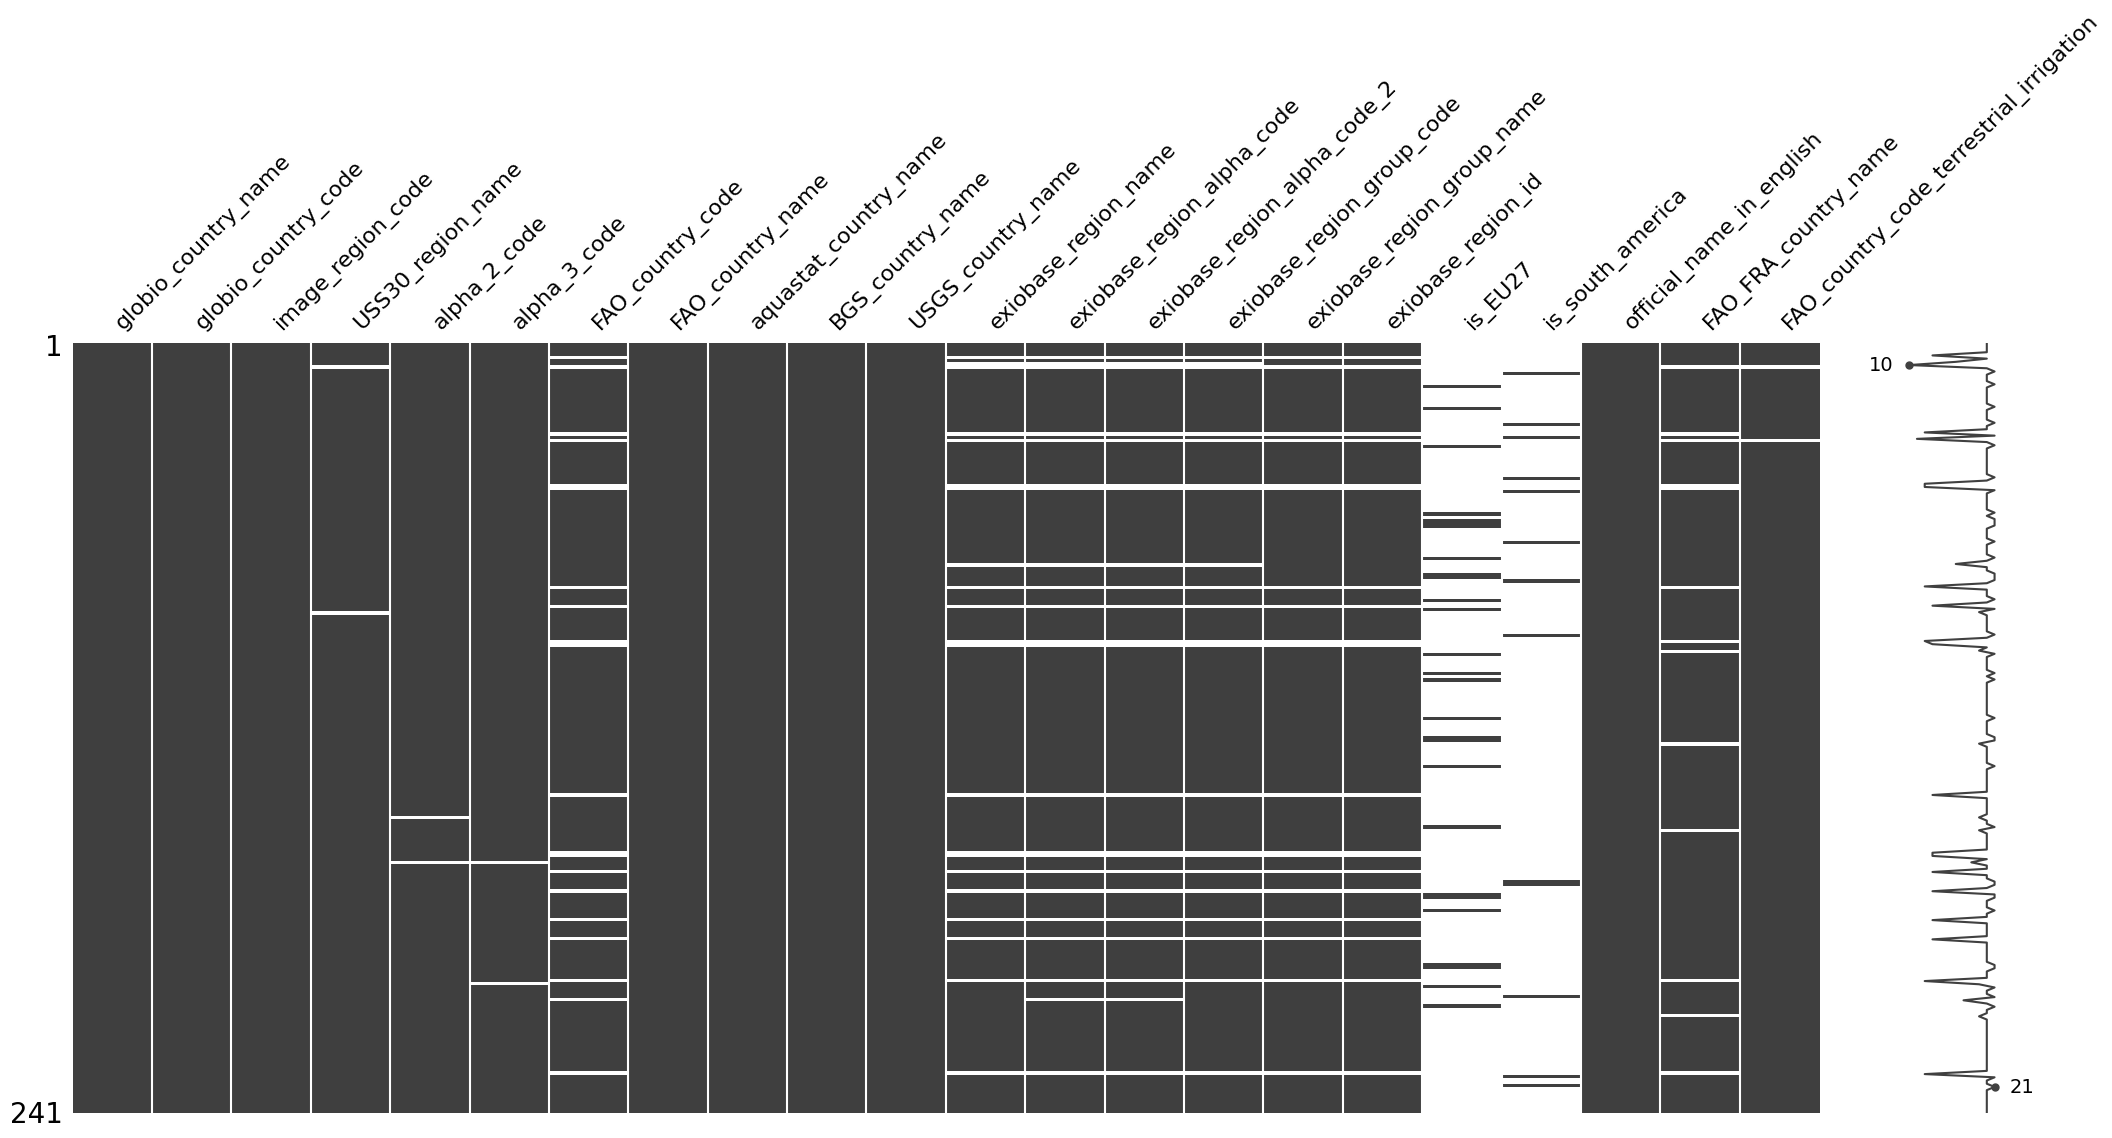

In [30]:
msno.matrix(country_specs)

**Conclusion**

- delete is_EU27 and is_south_america

<Axes: >

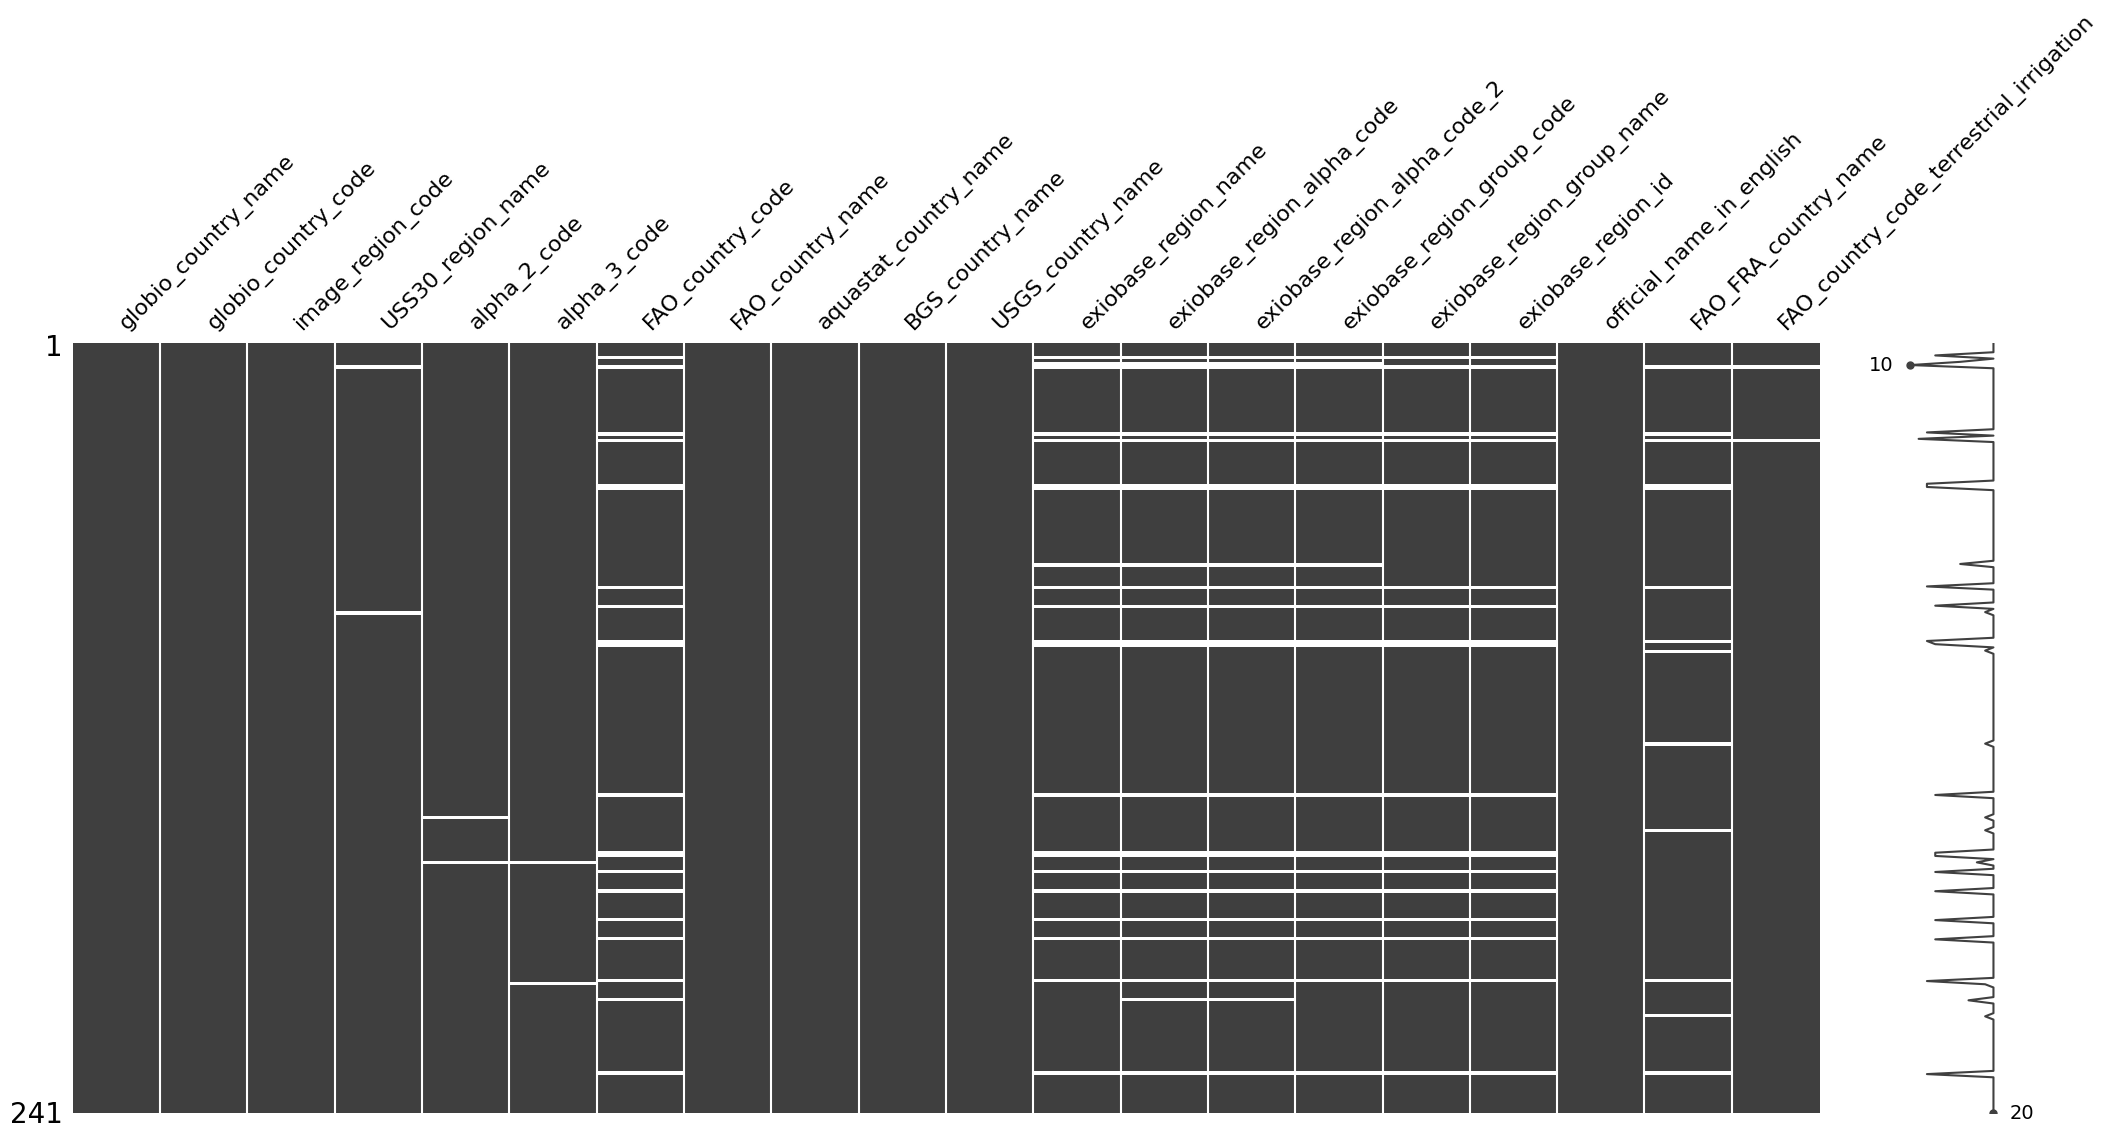

In [31]:
drop_cols = ["is_EU27", "is_south_america"]
country_specs = country_specs.drop(columns=drop_cols)
msno.matrix(country_specs)

In [32]:
tmp = country_specs.isna().mean(axis=1).round(2)
tmp.value_counts().sort_index()

0.00    211
0.05      7
0.10      1
0.15      1
0.20      2
0.35     10
0.40      7
0.45      1
0.50      1
Name: count, dtype: int64

In [33]:
threshold = 0.2
tmp[tmp >= threshold]

4      0.35
6      0.20
7      0.50
28     0.40
30     0.45
44     0.40
45     0.40
69     0.20
76     0.40
82     0.35
93     0.40
94     0.35
141    0.35
159    0.35
160    0.35
165    0.35
171    0.35
180    0.35
186    0.35
199    0.40
228    0.40
dtype: float64

In [34]:
drop_idxs = tmp[tmp > threshold].index
country_specs.loc[drop_idxs, :]

,globio_country_name,globio_country_code,image_region_code,USS30_region_name,alpha_2_code,alpha_3_code,FAO_country_code,FAO_country_name,aquastat_country_name,BGS_country_name,USGS_country_name,exiobase_region_name,exiobase_region_alpha_code,exiobase_region_alpha_code_2,exiobase_region_group_code,exiobase_region_group_name,exiobase_region_id,official_name_in_english,FAO_FRA_country_name,FAO_country_code_terrestrial_irrigation
4,Andorra,20,11,W.Europe,AD,AND,NaN,Andorra,Andorra,Andorra,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,Principality of Andorra,Andorra,6.0
7,Antarctica,10,26,NaN,AQ,ATA,NaN,Antarctica,Antarctica,Antarctica,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,Antarctica,NaN,NaN
28,Bouvet Island,74,6,Rest S.Am.,BV,BVT,NaN,Bouvet Island,Bouvet Island,Bouvet Island,Bouvet Island,NaN,NaN,NaN,NaN,NaN,NaN,Bouvet Island,NaN,31.0
30,British Indian Ocean Territory,86,18,Rest S Asia,IO,IOT,NaN,British Indian Ocean Territory,British Indian Ocean Territory,British Indian Ocean Territory,British Indian Ocean Territory,NaN,NaN,NaN,NaN,NaN,NaN,British Indian Ocean Territory,NaN,NaN
44,Christmas Island,162,24,Oceania,CX,CXR,NaN,Christmas Island,Christmas Island,Christmas Island,Christmas Island,NaN,NaN,NaN,NaN,NaN,NaN,Christmas Island,NaN,42.0
45,Cocos (Keeling) Islands,166,24,Oceania,CC,CCK,NaN,Cocos (Keeling) Islands,Cocos (Keeling) Islands,Cocos (Keeling) Islands,Cocos (Keeling) Islands,NaN,NaN,NaN,NaN,NaN,NaN,Cocos (Keeling) Islands,NaN,43.0
76,French Southern Territories,260,24,Oceania,TF,ATF,NaN,French Southern Territories,French Southern Territories,French Southern Territories,French Southern Territories,NaN,NaN,NaN,NaN,NaN,NaN,French Southern Territories,NaN,71.0
82,Gibraltar,292,11,W.Europe,GI,GIB,NaN,Gibraltar,Gibraltar,Gibraltar,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,Gibraltar,Gibraltar (Desk study),82.0
93,Heard Island and McDonald Islands,334,24,Oceania,HM,HMD,NaN,Heard Island and McDonald Islands,Heard Island and McDonald Islands,Heard Island and McDonald Islands,Heard Island and McDonald Islands,NaN,NaN,NaN,NaN,NaN,NaN,Heard Island and McDonald Islands,NaN,92.0
94,Holy See (Vatican City State),336,11,W.Europe,VA,VAT,NaN,Holy See (Vatican City State),Holy See (Vatican City State),Holy See (Vatican City State),Holy See (Vatican City State),NaN,NaN,NaN,NaN,NaN,NaN,Holy See (Vatican City State),Holy See (Desk study),94.0


**Conclusion**

- countries with Nan rate > 0.3 are Island or -100k pop (Monaco, Antigua)

<Axes: >

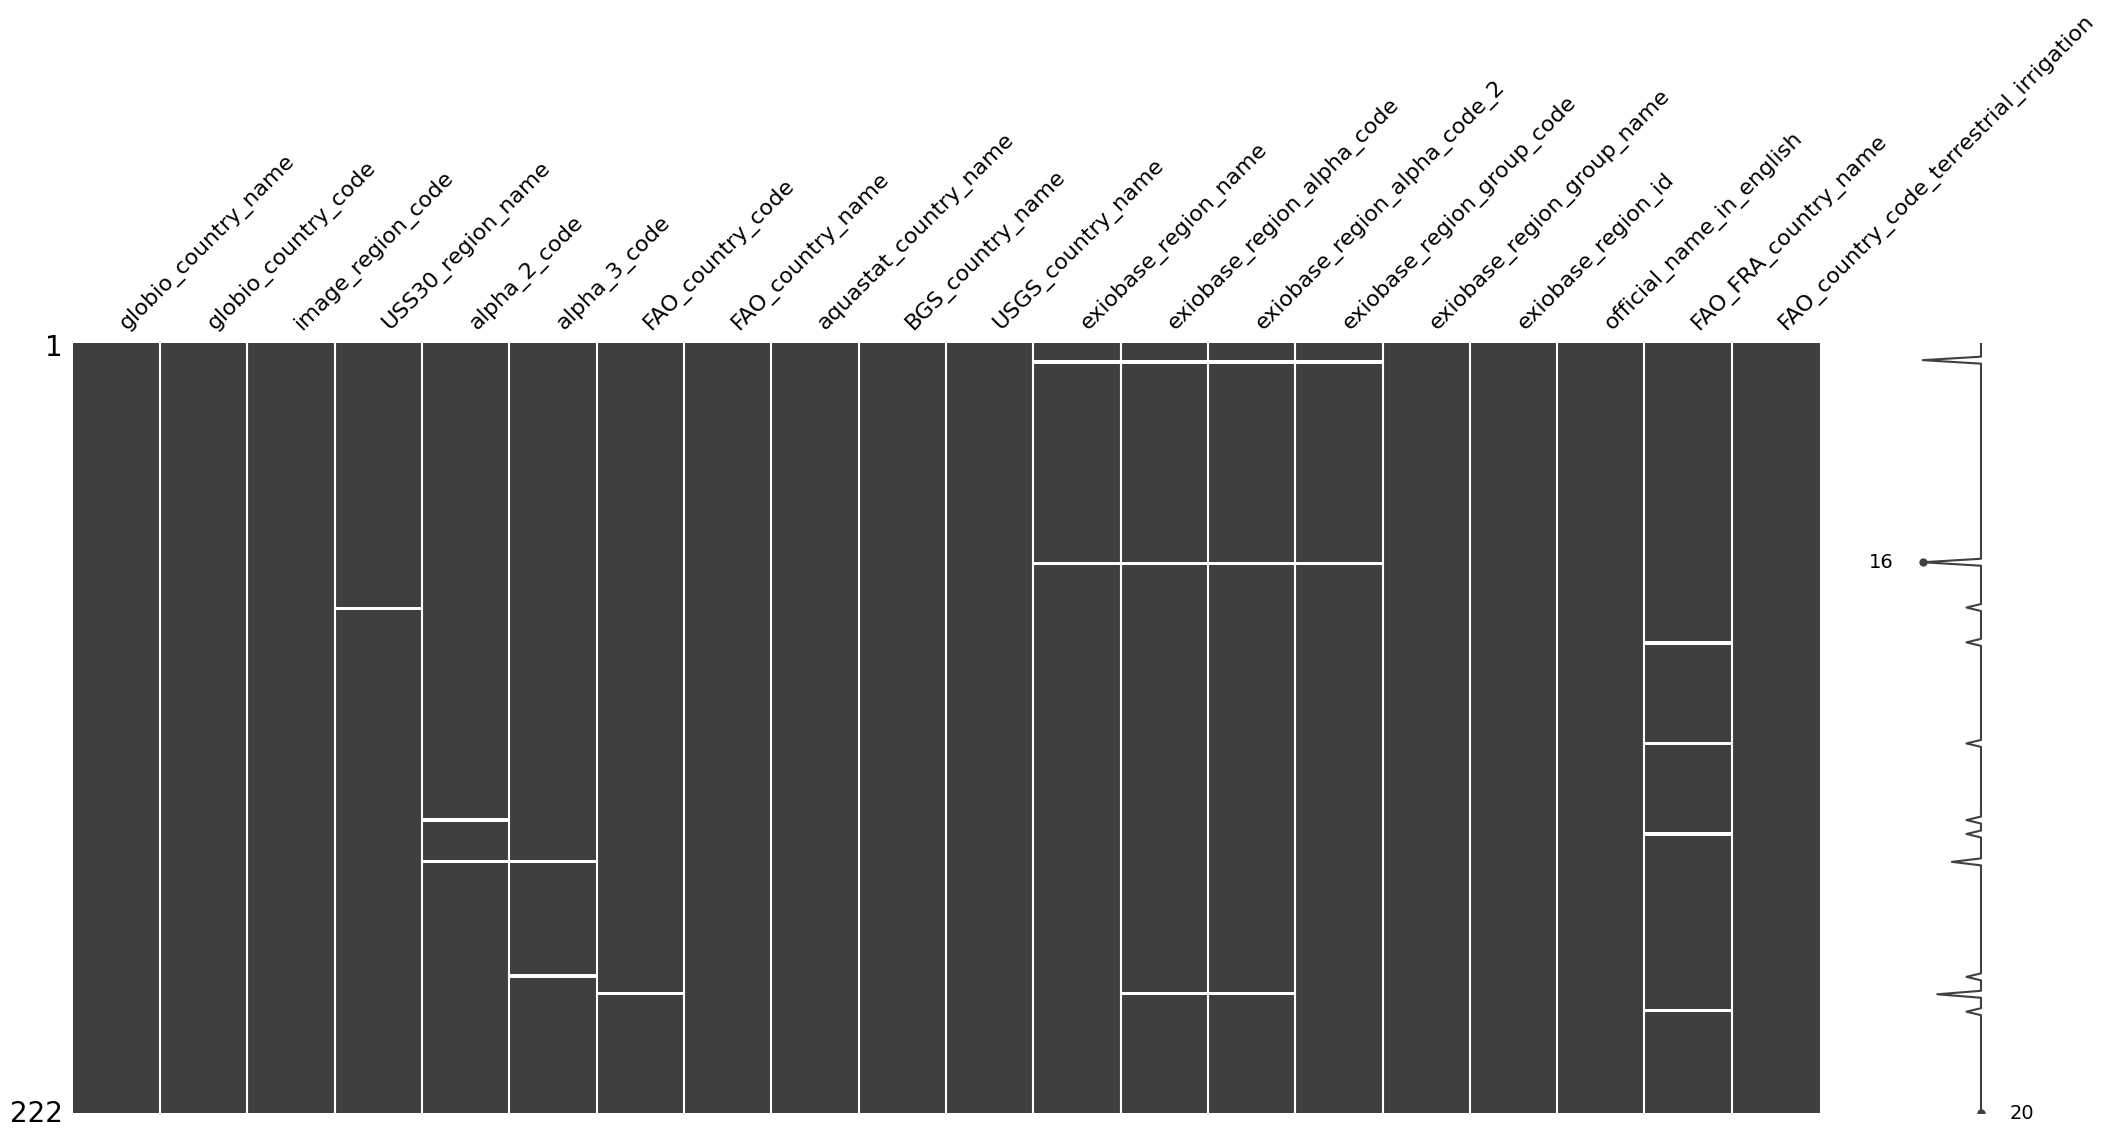

In [35]:
country_specs = country_specs.drop(
    index=drop_idxs, columns=drop_cols, errors="ignore"
)
msno.matrix(country_specs)

In [36]:
num_cols = country_specs.select_dtypes(
    include=["float", "int"]
).columns.tolist()

num_cols = [i for i in num_cols if "code" not in i]

categ_cols = [
    "alpha_3_code",
    "FAO_country_name",
    "exiobase_region_name",
    "globio_country_code",
    "globio_country_name",
    "USS30_region_name",
]


country_specs = country_specs.loc[:, num_cols + categ_cols]

In [37]:
country_specs

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code,globio_country_name,USS30_region_name
0,45.0,AFG,Afghanistan,RoW Asia and Pacific,4,Afghanistan,Rest S Asia
1,47.0,ALB,Albania,RoW Europe,8,Albania,C.Europe
2,48.0,DZA,Algeria,RoW Africa,12,Algeria,N.Africa
3,45.0,ASM,American Samoa,RoW Asia and Pacific,16,American Samoa,Oceania
5,48.0,AGO,Angola,RoW Africa,24,Angola,Rest S Africa
...,...,...,...,...,...,...,...
236,45.0,WLF,Wallis and Futuna Islands,RoW Asia and Pacific,876,Wallis and Futuna,Oceania
237,48.0,ESH,Western Sahara,RoW Africa,732,Western Sahara,N.Africa
238,49.0,YEM,Yemen,RoW Middle East,887,Yemen,M.East
239,48.0,ZMB,Zambia,RoW Africa,894,Zambia,Rest S Africa


#### Data Inspection

In [38]:
country_specs.FAO_country_name.value_counts()

FAO_country_name
Afghanistan             1
Panama                  1
Netherlands Antilles    1
New Caledonia           1
New Zealand             1
                       ..
Grenada                 1
Guadeloupe              1
Guam                    1
Guatemala               1
Zimbabwe                1
Name: count, Length: 222, dtype: int64

In [39]:
country_specs.FAO_country_name.nunique()

222

In [40]:
country_specs.USS30_region_name.value_counts()

USS30_region_name
Rest C.Am.       32
W.Africa         24
W.Europe         21
Oceania          20
C.Europe         18
E.Africa         16
M.East           14
Rest S.Am.       13
Rest S Africa    10
SE.Asia           9
Rest S Asia       7
N.Africa          6
China             5
Stan              5
Russia            4
Ukraine           3
Indonesia         3
Korea             2
USA               2
Brazil            1
Canada            1
India             1
Japan             1
Mexico            1
Sth Africa        1
Turkey            1
Name: count, dtype: int64

In [41]:
country_specs.FAO_country_name.value_counts().value_counts()

count
1    222
Name: count, dtype: int64

In [42]:
country_specs.groupby("exiobase_region_name").FAO_country_name.count()

exiobase_region_name
Australia                1
Austria                  1
Belgium                  1
Brazil                   1
Bulgaria                 1
Canada                   1
China                    1
Croatia                  1
Cyprus                   1
Czech Republic           1
Denmark                  1
Estonia                  1
Finland                  1
France                   1
Germany                  1
Greece                   1
Hungary                  1
India                    1
Indonesia                1
Ireland                  1
Italy                    1
Japan                    1
Latvia                   1
Lithuania                1
Luxembourg               1
Malta                    1
Mexico                   1
Netherlands              1
Norway                   2
Poland                   1
Portugal                 1
RoW Africa              57
RoW America             44
RoW Asia and Pacific    50
RoW Europe              11
RoW Middle East         13
Romania

### Crops 

#### Wheat Selection

In [43]:
feature = "Wheat"
crops = crops.loc[crops.item_name == feature, :]
crops.head()

,id,globio_country_code,item_name,item_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
0,1,40,Wheat,15,0.000008,0.001838,0,0.000429,0,0.000573,...,0.000009,0.000009,1.684354e-08,1.710999e-08,1.190762e-07,1.271384e-07,0.000000e+00,0.000000e+00,0.000028,0.000000e+00
59,60,56,Wheat,15,0.000004,0.001027,0,0.000096,0,0.000086,...,0.000010,0.000034,2.536948e-08,9.013248e-08,6.098158e-09,2.409022e-08,0.000000e+00,0.000000e+00,0.000004,1.124617e-09
105,106,100,Wheat,15,0.000006,0.001677,0,0.000080,0,0.000259,...,0.000005,0.000008,6.229653e-09,1.560400e-08,9.055939e-07,1.215875e-06,5.277333e-13,2.638667e-12,0.000016,8.280859e-08
187,188,191,Wheat,15,0.000005,0.001500,0,0.000162,0,0.000227,...,0.000005,0.000007,1.032548e-08,1.395820e-08,1.588498e-08,1.645537e-08,0.000000e+00,0.000000e+00,0.000041,0.000000e+00
250,251,196,Wheat,15,0.000010,0.003872,0,0.000373,0,0.000549,...,0.000002,0.000011,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000212,0.000000e+00


In [44]:
item_cols = [i for i in crops.columns if "item" in i]
item_cols

['item_name', 'item_code']

In [45]:
crops.drop(columns=item_cols, inplace=True, errors="ignore")
crops.head()

,id,globio_country_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,msa_n_deposition_static,msa_n_deposition_dynamic,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
0,1,40,0.000008,0.001838,0,0.000429,0,0.000573,0.000058,0,...,0.000009,0.000009,1.684354e-08,1.710999e-08,1.190762e-07,1.271384e-07,0.000000e+00,0.000000e+00,0.000028,0.000000e+00
59,60,56,0.000004,0.001027,0,0.000096,0,0.000086,0.000031,0,...,0.000010,0.000034,2.536948e-08,9.013248e-08,6.098158e-09,2.409022e-08,0.000000e+00,0.000000e+00,0.000004,1.124617e-09
105,106,100,0.000006,0.001677,0,0.000080,0,0.000259,0.000000,0,...,0.000005,0.000008,6.229653e-09,1.560400e-08,9.055939e-07,1.215875e-06,5.277333e-13,2.638667e-12,0.000016,8.280859e-08
187,188,191,0.000005,0.001500,0,0.000162,0,0.000227,0.000005,0,...,0.000005,0.000007,1.032548e-08,1.395820e-08,1.588498e-08,1.645537e-08,0.000000e+00,0.000000e+00,0.000041,0.000000e+00
250,251,196,0.000010,0.003872,0,0.000373,0,0.000549,0.000000,0,...,0.000002,0.000011,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000212,0.000000e+00


#### Display

In [46]:
crops.head(10)

,id,globio_country_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,msa_n_deposition_static,msa_n_deposition_dynamic,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
0,1,40,0.000008,0.001838,0,0.000429,0,0.000573,0.000058,0,...,0.000009,0.000009,1.684354e-08,1.710999e-08,1.190762e-07,1.271384e-07,0.000000e+00,0.000000e+00,0.000028,0.000000e+00
59,60,56,0.000004,0.001027,0,0.000096,0,0.000086,0.000031,0,...,0.000010,0.000034,2.536948e-08,9.013248e-08,6.098158e-09,2.409022e-08,0.000000e+00,0.000000e+00,0.000004,1.124617e-09
105,106,100,0.000006,0.001677,0,0.000080,0,0.000259,0.000000,0,...,0.000005,0.000008,6.229653e-09,1.560400e-08,9.055939e-07,1.215875e-06,5.277333e-13,2.638667e-12,0.000016,8.280859e-08
187,188,191,0.000005,0.001500,0,0.000162,0,0.000227,0.000005,0,...,0.000005,0.000007,1.032548e-08,1.395820e-08,1.588498e-08,1.645537e-08,0.000000e+00,0.000000e+00,0.000041,0.000000e+00
250,251,196,0.000010,0.003872,0,0.000373,0,0.000549,0.000000,0,...,0.000002,0.000011,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000212,0.000000e+00
318,319,203,0.000006,0.001568,0,0.000189,0,0.000206,0.000076,0,...,0.000005,0.000008,9.896137e-09,1.459425e-08,3.446216e-08,4.966610e-08,0.000000e+00,0.000000e+00,0.000013,9.174910e-09
380,381,208,0.000005,0.001086,0,0.000064,0,0.000082,0.000010,0,...,0.000013,0.000062,3.809110e-08,1.888159e-07,1.002238e-06,5.011192e-06,0.000000e+00,0.000000e+00,0.000020,0.000000e+00
422,423,233,0.000006,0.002082,0,0.000182,0,0.000382,0.000002,0,...,0.000016,0.000046,0.000000e+00,0.000000e+00,1.512369e-07,6.841379e-07,1.315420e-11,5.193183e-11,0.000030,0.000000e+00
455,456,246,0.000010,0.002200,0,0.001124,0,0.002678,0.000033,0,...,0.000008,0.000040,1.346378e-08,6.731890e-08,2.231763e-06,8.349809e-06,2.821251e-10,8.245805e-10,0.000307,0.000000e+00
488,489,250,0.000005,0.001308,0,0.000123,0,0.000154,0.000027,0,...,0.000010,0.000034,1.774968e-08,5.984167e-08,4.968544e-07,2.098178e-06,1.211383e-11,6.056917e-11,0.000010,0.000000e+00


In [47]:
crops.tail(10)

,id,globio_country_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,msa_n_deposition_static,msa_n_deposition_dynamic,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
1014,1015,442,0.000006,0.001574,0,0.000251,0,0.000180,0.000031,0,...,3.892190e-07,3.892190e-07,3.497223e-09,3.497223e-09,2.330524e-10,2.330524e-10,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1045,1046,470,0.000003,0.001740,0,0.000195,0,0.000140,0.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
1087,1088,528,0.000004,0.000954,0,0.000043,0,0.000068,0.000044,0,...,5.099208e-05,2.303664e-04,8.369022e-08,3.528362e-07,1.737926e-07,8.624852e-07,1.647964e-12,8.239820e-12,0.000044,1.309158e-09
1136,1137,616,0.000006,0.001824,0,0.000114,0,0.000223,0.000038,0,...,5.877008e-06,1.356746e-05,4.766983e-09,2.372480e-08,4.457012e-07,8.832835e-07,1.705253e-09,3.131862e-09,0.000028,4.918817e-08
1198,1199,620,0.000019,0.004369,0,0.000658,0,0.001300,0.000000,0,...,1.396330e-05,6.720259e-05,3.715075e-08,1.765973e-07,3.500926e-05,1.718603e-04,0.000000e+00,0.000000e+00,0.000069,6.361235e-08
1273,1274,642,0.000006,0.001821,0,0.000085,0,0.000290,0.000008,0,...,1.021804e-05,1.555743e-05,1.899574e-08,2.717520e-08,5.210948e-07,5.915479e-07,0.000000e+00,0.000000e+00,0.000020,3.788797e-10
1345,1346,703,0.000007,0.001865,0,0.000188,0,0.000344,0.000046,0,...,9.069581e-06,9.098274e-06,1.640027e-08,1.736130e-08,1.029281e-07,1.108402e-07,2.381096e-11,1.190548e-10,0.000005,3.663405e-09
1413,1414,705,0.000005,0.001697,0,0.000429,0,0.000799,0.000065,0,...,6.128620e-06,8.277826e-06,1.169461e-08,1.579572e-08,5.482171e-08,7.407595e-08,0.000000e+00,0.000000e+00,0.000002,0.000000e+00
1474,1475,724,0.000017,0.003846,0,0.000259,0,0.000670,0.000000,0,...,1.441660e-05,6.037029e-05,3.559401e-08,1.443960e-07,2.291415e-05,9.807065e-05,0.000000e+00,0.000000e+00,0.000026,8.856009e-09
1576,1577,752,0.000006,0.001286,0,0.000435,0,0.001130,0.000039,0,...,9.380534e-06,3.050719e-05,5.753966e-08,2.663251e-07,1.573707e-05,5.798875e-05,0.000000e+00,0.000000e+00,0.000168,0.000000e+00


In [48]:
crops.sample(10)

,id,globio_country_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,msa_n_deposition_static,msa_n_deposition_dynamic,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
1045,1046,470,0.000003,0.001740,0,0.000195,0,0.000140,0.000000,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
1413,1414,705,0.000005,0.001697,0,0.000429,0,0.000799,0.000065,0,...,0.000006,0.000008,1.169461e-08,1.579572e-08,5.482171e-08,7.407595e-08,0.000000e+00,0.000000e+00,0.000002,0.000000e+00
488,489,250,0.000005,0.001308,0,0.000123,0,0.000154,0.000027,0,...,0.000010,0.000034,1.774968e-08,5.984167e-08,4.968544e-07,2.098178e-06,1.211383e-11,6.056917e-11,0.000010,0.000000e+00
1087,1088,528,0.000004,0.000954,0,0.000043,0,0.000068,0.000044,0,...,0.000051,0.000230,8.369022e-08,3.528362e-07,1.737926e-07,8.624852e-07,1.647964e-12,8.239820e-12,0.000044,1.309158e-09
105,106,100,0.000006,0.001677,0,0.000080,0,0.000259,0.000000,0,...,0.000005,0.000008,6.229653e-09,1.560400e-08,9.055939e-07,1.215875e-06,5.277333e-13,2.638667e-12,0.000016,8.280859e-08
919,920,428,0.000005,0.001806,0,0.000263,0,0.000288,0.000019,0,...,0.000009,0.000018,7.846164e-08,1.956355e-07,4.307264e-07,6.364558e-07,7.091496e-12,3.545748e-11,0.000098,3.021050e-07
59,60,56,0.000004,0.001027,0,0.000096,0,0.000086,0.000031,0,...,0.000010,0.000034,2.536948e-08,9.013248e-08,6.098158e-09,2.409022e-08,0.000000e+00,0.000000e+00,0.000004,1.124617e-09
1273,1274,642,0.000006,0.001821,0,0.000085,0,0.000290,0.000008,0,...,0.000010,0.000016,1.899574e-08,2.717520e-08,5.210948e-07,5.915479e-07,0.000000e+00,0.000000e+00,0.000020,3.788797e-10
1345,1346,703,0.000007,0.001865,0,0.000188,0,0.000344,0.000046,0,...,0.000009,0.000009,1.640027e-08,1.736130e-08,1.029281e-07,1.108402e-07,2.381096e-11,1.190548e-10,0.000005,3.663405e-09
962,963,440,0.000006,0.001830,0,0.000121,0,0.000199,0.000019,0,...,0.000013,0.000023,5.706453e-08,1.000807e-07,1.757487e-07,2.955380e-07,1.549411e-10,4.286869e-10,0.000038,9.561366e-09


#### Structure

In [49]:
crops.drop(columns="id", inplace=True, errors="ignore")

In [50]:
crops.shape

(27, 27)

In [51]:
crops.columns

Index(['globio_country_code', 'msa_land_use_dynamic', 'msa_land_use_static',
       'msa_fragmentation_dynamic', 'msa_fragmentation_static',
       'msa_encroachment_dynamic', 'msa_encroachment_static',
       'msa_n_deposition_static', 'msa_n_deposition_dynamic',
       'msa_climate_change_terrestrial_dynamic',
       'msa_climate_change_aquatic_dynamic',
       'msa_aquatic_wetland_conversion_static',
       'msa_aquatic_wetland_conversion_dynamic',
       'msa_aquatic_land_use_river_static_wm',
       'msa_aquatic_land_use_river_static_cut',
       'msa_aquatic_land_use_river_dynamic_wm',
       'msa_aquatic_land_use_river_dynamic_cut',
       'msa_aquatic_land_use_wetland_static_wm',
       'msa_aquatic_land_use_wetland_static_cut',
       'msa_aquatic_land_use_wetland_dynamic_wm',
       'msa_aquatic_land_use_wetland_dynamic_cut',
       'msa_aquatic_HD_water_withdrawn_static_wm',
       'msa_aquatic_HD_water_withdrawn_static_cut',
       'msa_aquatic_HD_water_withdrawn_dynamic_wm

In [52]:
crops.dtypes

globio_country_code                             int64
msa_land_use_dynamic                          float64
msa_land_use_static                           float64
msa_fragmentation_dynamic                       int64
msa_fragmentation_static                      float64
msa_encroachment_dynamic                        int64
msa_encroachment_static                       float64
msa_n_deposition_static                       float64
msa_n_deposition_dynamic                        int64
msa_climate_change_terrestrial_dynamic        float64
msa_climate_change_aquatic_dynamic            float64
msa_aquatic_wetland_conversion_static         float64
msa_aquatic_wetland_conversion_dynamic        float64
msa_aquatic_land_use_river_static_wm          float64
msa_aquatic_land_use_river_static_cut         float64
msa_aquatic_land_use_river_dynamic_wm         float64
msa_aquatic_land_use_river_dynamic_cut        float64
msa_aquatic_land_use_wetland_static_wm        float64
msa_aquatic_land_use_wetland

In [53]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 1576
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   globio_country_code                         27 non-null     int64  
 1   msa_land_use_dynamic                        27 non-null     float64
 2   msa_land_use_static                         27 non-null     float64
 3   msa_fragmentation_dynamic                   27 non-null     int64  
 4   msa_fragmentation_static                    27 non-null     float64
 5   msa_encroachment_dynamic                    27 non-null     int64  
 6   msa_encroachment_static                     27 non-null     float64
 7   msa_n_deposition_static                     27 non-null     float64
 8   msa_n_deposition_dynamic                    27 non-null     int64  
 9   msa_climate_change_terrestrial_dynamic      27 non-null     float64
 10  msa_climate_change_

In [54]:
crops.dtypes.value_counts()

float64    23
int64       4
Name: count, dtype: int64

In [55]:
for dtype in ["object", "float", "int"]:
    selected_dtype = crops.select_dtypes(include=[dtype])
    display(selected_dtype.columns)

Index([], dtype='object')

Index(['msa_land_use_dynamic', 'msa_land_use_static',
       'msa_fragmentation_static', 'msa_encroachment_static',
       'msa_n_deposition_static', 'msa_climate_change_terrestrial_dynamic',
       'msa_climate_change_aquatic_dynamic',
       'msa_aquatic_wetland_conversion_static',
       'msa_aquatic_wetland_conversion_dynamic',
       'msa_aquatic_land_use_river_static_wm',
       'msa_aquatic_land_use_river_static_cut',
       'msa_aquatic_land_use_river_dynamic_wm',
       'msa_aquatic_land_use_river_dynamic_cut',
       'msa_aquatic_land_use_wetland_static_wm',
       'msa_aquatic_land_use_wetland_static_cut',
       'msa_aquatic_land_use_wetland_dynamic_wm',
       'msa_aquatic_land_use_wetland_dynamic_cut',
       'msa_aquatic_HD_water_withdrawn_static_wm',
       'msa_aquatic_HD_water_withdrawn_static_cut',
       'msa_aquatic_HD_water_withdrawn_dynamic_wm',
       'msa_aquatic_HD_water_withdrawn_dynamic_cut',
       'msa_aquatic_lakes_eutrophication_static',
       'msa_aqua

Index(['globio_country_code', 'msa_fragmentation_dynamic',
       'msa_encroachment_dynamic', 'msa_n_deposition_dynamic'],
      dtype='object')

In [56]:
_num = crops.select_dtypes(include=["number"])
_num

,globio_country_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,msa_n_deposition_static,msa_n_deposition_dynamic,msa_climate_change_terrestrial_dynamic,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
0,40,0.000008,0.001838,0,0.000429,0,0.000573,0.000058,0,0.000002,...,8.792449e-06,8.966572e-06,1.684354e-08,1.710999e-08,1.190762e-07,1.271384e-07,0.000000e+00,0.000000e+00,0.000028,0.000000e+00
59,56,0.000004,0.001027,0,0.000096,0,0.000086,0.000031,0,0.000003,...,9.744745e-06,3.421372e-05,2.536948e-08,9.013248e-08,6.098158e-09,2.409022e-08,0.000000e+00,0.000000e+00,0.000004,1.124617e-09
105,100,0.000006,0.001677,0,0.000080,0,0.000259,0.000000,0,0.000002,...,5.146988e-06,8.177352e-06,6.229653e-09,1.560400e-08,9.055939e-07,1.215875e-06,5.277333e-13,2.638667e-12,0.000016,8.280859e-08
187,191,0.000005,0.001500,0,0.000162,0,0.000227,0.000005,0,0.000002,...,5.411119e-06,7.314865e-06,1.032548e-08,1.395820e-08,1.588498e-08,1.645537e-08,0.000000e+00,0.000000e+00,0.000041,0.000000e+00
250,196,0.000010,0.003872,0,0.000373,0,0.000549,0.000000,0,0.000006,...,2.405635e-06,1.087702e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000212,0.000000e+00
318,203,0.000006,0.001568,0,0.000189,0,0.000206,0.000076,0,0.000002,...,5.462592e-06,7.648190e-06,9.896137e-09,1.459425e-08,3.446216e-08,4.966610e-08,0.000000e+00,0.000000e+00,0.000013,9.174910e-09
380,208,0.000005,0.001086,0,0.000064,0,0.000082,0.000010,0,0.000002,...,1.257664e-05,6.234687e-05,3.809110e-08,1.888159e-07,1.002238e-06,5.011192e-06,0.000000e+00,0.000000e+00,0.000020,0.000000e+00
422,233,0.000006,0.002082,0,0.000182,0,0.000382,0.000002,0,0.000005,...,1.585986e-05,4.574365e-05,0.000000e+00,0.000000e+00,1.512369e-07,6.841379e-07,1.315420e-11,5.193183e-11,0.000030,0.000000e+00
455,246,0.000010,0.002200,0,0.001124,0,0.002678,0.000033,0,0.000007,...,7.911153e-06,3.955576e-05,1.346378e-08,6.731890e-08,2.231763e-06,8.349809e-06,2.821251e-10,8.245805e-10,0.000307,0.000000e+00
488,250,0.000005,0.001308,0,0.000123,0,0.000154,0.000027,0,0.000002,...,1.019209e-05,3.359155e-05,1.774968e-08,5.984167e-08,4.968544e-07,2.098178e-06,1.211383e-11,6.056917e-11,0.000010,0.000000e+00


In [57]:
_feat_cols = [i for i in _num.columns if "msa" in i]
_feat_cols

['msa_land_use_dynamic',
 'msa_land_use_static',
 'msa_fragmentation_dynamic',
 'msa_fragmentation_static',
 'msa_encroachment_dynamic',
 'msa_encroachment_static',
 'msa_n_deposition_static',
 'msa_n_deposition_dynamic',
 'msa_climate_change_terrestrial_dynamic',
 'msa_climate_change_aquatic_dynamic',
 'msa_aquatic_wetland_conversion_static',
 'msa_aquatic_wetland_conversion_dynamic',
 'msa_aquatic_land_use_river_static_wm',
 'msa_aquatic_land_use_river_static_cut',
 'msa_aquatic_land_use_river_dynamic_wm',
 'msa_aquatic_land_use_river_dynamic_cut',
 'msa_aquatic_land_use_wetland_static_wm',
 'msa_aquatic_land_use_wetland_static_cut',
 'msa_aquatic_land_use_wetland_dynamic_wm',
 'msa_aquatic_land_use_wetland_dynamic_cut',
 'msa_aquatic_HD_water_withdrawn_static_wm',
 'msa_aquatic_HD_water_withdrawn_static_cut',
 'msa_aquatic_HD_water_withdrawn_dynamic_wm',
 'msa_aquatic_HD_water_withdrawn_dynamic_cut',
 'msa_aquatic_lakes_eutrophication_static',
 'msa_aquatic_lakes_eutrophication_dyna

#### Separation Static/Dynamic

In [58]:
categ_cols = [i for i in crops.columns if "msa" not in i]
static_cols = [i for i in crops.columns if "static" in i]
dynamic_cols = [i for i in crops.columns if "dynamic" in i]

display(categ_cols)
display(static_cols)
display(dynamic_cols)

['globio_country_code']

['msa_land_use_static',
 'msa_fragmentation_static',
 'msa_encroachment_static',
 'msa_n_deposition_static',
 'msa_aquatic_wetland_conversion_static',
 'msa_aquatic_land_use_river_static_wm',
 'msa_aquatic_land_use_river_static_cut',
 'msa_aquatic_land_use_wetland_static_wm',
 'msa_aquatic_land_use_wetland_static_cut',
 'msa_aquatic_HD_water_withdrawn_static_wm',
 'msa_aquatic_HD_water_withdrawn_static_cut',
 'msa_aquatic_lakes_eutrophication_static']

['msa_land_use_dynamic',
 'msa_fragmentation_dynamic',
 'msa_encroachment_dynamic',
 'msa_n_deposition_dynamic',
 'msa_climate_change_terrestrial_dynamic',
 'msa_climate_change_aquatic_dynamic',
 'msa_aquatic_wetland_conversion_dynamic',
 'msa_aquatic_land_use_river_dynamic_wm',
 'msa_aquatic_land_use_river_dynamic_cut',
 'msa_aquatic_land_use_wetland_dynamic_wm',
 'msa_aquatic_land_use_wetland_dynamic_cut',
 'msa_aquatic_HD_water_withdrawn_dynamic_wm',
 'msa_aquatic_HD_water_withdrawn_dynamic_cut',
 'msa_aquatic_lakes_eutrophication_dynamic']

In [59]:
crops_static = crops.loc[:, categ_cols + static_cols]
crops_static.head()

,globio_country_code,msa_land_use_static,msa_fragmentation_static,msa_encroachment_static,msa_n_deposition_static,msa_aquatic_wetland_conversion_static,msa_aquatic_land_use_river_static_wm,msa_aquatic_land_use_river_static_cut,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_lakes_eutrophication_static
0,40,0.001838,0.000429,0.000573,0.000058,3.324028e-08,0.000003,0.000003,0.000009,0.000009,1.190762e-07,1.271384e-07,0.000028
59,56,0.001027,0.000096,0.000086,0.000031,0.000000e+00,0.000002,0.000002,0.000010,0.000034,6.098158e-09,2.409022e-08,0.000004
105,100,0.001677,0.000080,0.000259,0.000000,0.000000e+00,0.000001,0.000003,0.000005,0.000008,9.055939e-07,1.215875e-06,0.000016
187,191,0.001500,0.000162,0.000227,0.000005,0.000000e+00,0.000002,0.000002,0.000005,0.000007,1.588498e-08,1.645537e-08,0.000041
250,196,0.003872,0.000373,0.000549,0.000000,0.000000e+00,0.000000,0.000000,0.000002,0.000011,0.000000e+00,0.000000e+00,0.000212


In [60]:
crops_dynamic = crops.loc[:, categ_cols + dynamic_cols]
crops_dynamic

,globio_country_code,msa_land_use_dynamic,msa_fragmentation_dynamic,msa_encroachment_dynamic,msa_n_deposition_dynamic,msa_climate_change_terrestrial_dynamic,msa_climate_change_aquatic_dynamic,msa_aquatic_wetland_conversion_dynamic,msa_aquatic_land_use_river_dynamic_wm,msa_aquatic_land_use_river_dynamic_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_dynamic
0,40,0.000008,0,0,0,0.000002,2.386440e-08,3.693364e-09,5.675150e-09,5.724546e-09,1.684354e-08,1.710999e-08,0.000000e+00,0.000000e+00,0.000000e+00
59,56,0.000004,0,0,0,0.000003,3.194282e-08,0.000000e+00,4.506775e-09,6.666832e-09,2.536948e-08,9.013248e-08,0.000000e+00,0.000000e+00,1.124617e-09
105,100,0.000006,0,0,0,0.000002,1.528870e-08,0.000000e+00,2.093992e-09,5.204152e-09,6.229653e-09,1.560400e-08,5.277333e-13,2.638667e-12,8.280859e-08
187,191,0.000005,0,0,0,0.000002,1.787622e-08,0.000000e+00,3.213445e-09,4.746856e-09,1.032548e-08,1.395820e-08,0.000000e+00,0.000000e+00,0.000000e+00
250,196,0.000010,0,0,0,0.000006,5.720370e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
318,203,0.000006,0,0,0,0.000002,2.419993e-08,0.000000e+00,2.260275e-09,4.917628e-09,9.896137e-09,1.459425e-08,0.000000e+00,0.000000e+00,9.174910e-09
380,208,0.000005,0,0,0,0.000002,1.631057e-08,0.000000e+00,0.000000e+00,0.000000e+00,3.809110e-08,1.888159e-07,0.000000e+00,0.000000e+00,0.000000e+00
422,233,0.000006,0,0,0,0.000005,4.591775e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.315420e-11,5.193183e-11,0.000000e+00
455,246,0.000010,0,0,0,0.000007,7.258227e-08,9.644825e-09,4.739460e-10,2.369730e-09,1.346378e-08,6.731890e-08,2.821251e-10,8.245805e-10,0.000000e+00
488,250,0.000005,0,0,0,0.000002,2.077014e-08,0.000000e+00,3.306530e-09,6.141185e-09,1.774968e-08,5.984167e-08,1.211383e-11,6.056917e-11,0.000000e+00


##### [ !!! ]
In the report we do have the separation between : 
- terestrial static, 
- terestrial dynamic 
- aquatic static

#### Summize

crops_static

In [61]:
crops_static

,globio_country_code,msa_land_use_static,msa_fragmentation_static,msa_encroachment_static,msa_n_deposition_static,msa_aquatic_wetland_conversion_static,msa_aquatic_land_use_river_static_wm,msa_aquatic_land_use_river_static_cut,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_lakes_eutrophication_static
0,40,0.001838,0.000429,0.000573,0.000058,3.324028e-08,2.882285e-06,2.904067e-06,8.792449e-06,8.966572e-06,1.190762e-07,1.271384e-07,0.000028
59,56,0.001027,0.000096,0.000086,0.000031,0.000000e+00,1.992877e-06,2.491592e-06,9.744745e-06,3.421372e-05,6.098158e-09,2.409022e-08,0.000004
105,100,0.001677,0.000080,0.000259,0.000000,0.000000e+00,1.096346e-06,2.640070e-06,5.146988e-06,8.177352e-06,9.055939e-07,1.215875e-06,0.000016
187,191,0.001500,0.000162,0.000227,0.000005,0.000000e+00,1.630183e-06,2.408084e-06,5.411119e-06,7.314865e-06,1.588498e-08,1.645537e-08,0.000041
250,196,0.003872,0.000373,0.000549,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.405635e-06,1.087702e-05,0.000000e+00,0.000000e+00,0.000212
318,203,0.001568,0.000189,0.000206,0.000076,0.000000e+00,1.193749e-06,2.494716e-06,5.462592e-06,7.648190e-06,3.446216e-08,4.966610e-08,0.000013
380,208,0.001086,0.000064,0.000082,0.000010,0.000000e+00,0.000000e+00,0.000000e+00,1.257664e-05,6.234687e-05,1.002238e-06,5.011192e-06,0.000020
422,233,0.002082,0.000182,0.000382,0.000002,0.000000e+00,3.221183e-07,1.490240e-06,1.585986e-05,4.574365e-05,1.512369e-07,6.841379e-07,0.000030
455,246,0.002200,0.001124,0.002678,0.000033,1.112103e-05,6.528967e-07,2.861519e-06,7.911153e-06,3.955576e-05,2.231763e-06,8.349809e-06,0.000307
488,250,0.001308,0.000123,0.000154,0.000027,5.358689e-07,1.487606e-06,2.653067e-06,1.019209e-05,3.359155e-05,4.968544e-07,2.098178e-06,0.000010


In [62]:
sum_static = crops_static.iloc[:, 1:].sum(axis=1)
sum_static

0       0.002951
59      0.001293
105     0.002051
187     0.001951
250     0.005020
318     0.002068
380     0.001343
422     0.002742
455     0.006413
488     0.001674
573     0.001350
635     0.004425
723     0.001964
805     0.001215
833     0.003087
919     0.002505
962     0.002251
1014    0.002040
1045    0.002075
1087    0.001445
1136    0.002257
1198    0.006686
1273    0.002257
1345    0.002473
1413    0.003011
1474    0.004999
1576    0.003187
dtype: float64

In [63]:
crops_static = crops_static.iloc[:, :1]
crops_static["sum_static"] = sum_static.values

/tmp/ipykernel_266285/1413319815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crops_static["sum_static"] = sum_static.values


#### Data Inspection

In [64]:
crops_static.describe()

,globio_country_code,sum_static
count,27.000000,27.000000
mean,387.740741,0.002768
std,214.025806,0.001489
min,40.000000,0.001215
25%,220.500000,0.001957
50%,372.000000,0.002257
75%,572.000000,0.003049
max,752.000000,0.006686


In [65]:
crops.globio_country_code.value_counts()

globio_country_code
40     1
380    1
724    1
705    1
703    1
642    1
620    1
616    1
528    1
470    1
442    1
440    1
428    1
372    1
56     1
348    1
300    1
276    1
250    1
246    1
233    1
208    1
203    1
196    1
191    1
100    1
752    1
Name: count, dtype: int64

In [66]:
crops.globio_country_code.nunique()

27

#### Merge Country Specs and crops

In [67]:
country_specs

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code,globio_country_name,USS30_region_name
0,45.0,AFG,Afghanistan,RoW Asia and Pacific,4,Afghanistan,Rest S Asia
1,47.0,ALB,Albania,RoW Europe,8,Albania,C.Europe
2,48.0,DZA,Algeria,RoW Africa,12,Algeria,N.Africa
3,45.0,ASM,American Samoa,RoW Asia and Pacific,16,American Samoa,Oceania
5,48.0,AGO,Angola,RoW Africa,24,Angola,Rest S Africa
...,...,...,...,...,...,...,...
236,45.0,WLF,Wallis and Futuna Islands,RoW Asia and Pacific,876,Wallis and Futuna,Oceania
237,48.0,ESH,Western Sahara,RoW Africa,732,Western Sahara,N.Africa
238,49.0,YEM,Yemen,RoW Middle East,887,Yemen,M.East
239,48.0,ZMB,Zambia,RoW Africa,894,Zambia,Rest S Africa


In [68]:
tmp = country_specs.loc[:, ["globio_country_code", "globio_country_name"]]
tmp.index = tmp.globio_country_code
tmp.drop(columns="globio_country_code", inplace=True)
tmp.index.name = None
tmp = tmp.to_dict().get("globio_country_name")
tmp

{4: 'Afghanistan',
 8: 'Albania',
 12: 'Algeria',
 16: 'American Samoa',
 24: 'Angola',
 660: 'Anguilla',
 28: 'Antigua and Barbuda',
 32: 'Argentina',
 51: 'Armenia',
 533: 'Aruba',
 36: 'Australia',
 40: 'Austria',
 31: 'Azerbaijan',
 44: 'Bahamas',
 48: 'Bahrain',
 50: 'Bangladesh',
 52: 'Barbados',
 112: 'Belarus',
 56: 'Belgium',
 84: 'Belize',
 204: 'Benin',
 60: 'Bermuda',
 64: 'Bhutan',
 68: 'Bolivia',
 70: 'Bosnia and Herzegovina',
 72: 'Botwana',
 76: 'Brazil',
 96: 'Brunei Darussalam',
 100: 'Bulgaria',
 854: 'Burkina Faso',
 108: 'Burundi',
 116: 'Cambodia',
 120: 'Cameroon',
 124: 'Canada',
 132: 'Cape Verde',
 136: 'Cayman Islands',
 140: 'Central African Republic',
 148: 'Chad',
 152: 'Chile',
 156: 'China',
 170: 'Colombia',
 174: 'Comoros',
 178: 'Congo',
 180: 'Congo, the Democratic Republic of the',
 184: 'Cook Islands',
 188: 'Costa Rica',
 384: "Côte d'Ivoire",
 191: 'Croatia',
 192: 'Cuba',
 196: 'Cyprus',
 203: 'Czech Republic',
 208: 'Denmark',
 262: 'Djibouti',

In [69]:
crops_static["globio_country_name"] = crops_static.globio_country_code.apply(
    lambda i: tmp.get(i, np.nan)
)
crops_static

/tmp/ipykernel_266285/3442270391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crops_static["globio_country_name"] = crops_static.globio_country_code.apply(


,globio_country_code,sum_static,globio_country_name
0,40,0.002951,Austria
59,56,0.001293,Belgium
105,100,0.002051,Bulgaria
187,191,0.001951,Croatia
250,196,0.005020,Cyprus
318,203,0.002068,Czech Republic
380,208,0.001343,Denmark
422,233,0.002742,Estonia
455,246,0.006413,Finland
488,250,0.001674,France


#### Nan

In [70]:
crops_static.isna().sum()

globio_country_code    0
sum_static             0
globio_country_name    0
dtype: int64

### Production

#### Table Analysis

In [71]:
Production.areacodes

,Area Code,M49 Code,Area
0,2,'004,Afghanistan
1,5100,'002,Africa
2,3,'008,Albania
3,4,'012,Algeria
4,5200,'019,Americas
...,...,...,...
240,5000,'001,World
241,249,'887,Yemen
242,248,'890,Yugoslav SFR
243,251,'894,Zambia


In [72]:
Production.flags

,Flag,Description
0,A,Official figure
1,E,Estimated value
2,I,Imputed value
3,M,Missing value (data cannot exist; not applicable)
4,X,Figure from international organizations


In [73]:
flags = {
    k: v
    for k, v in zip(
        Production.flags.Flag.values, Production.flags.Description.values
    )
}
flags

{'A': 'Official figure',
 'E': 'Estimated value',
 'I': 'Imputed value',
 'M': 'Missing value (data cannot exist; not applicable)',
 'X': 'Figure from international organizations'}

In [74]:
Production.itemcodes

,Item Code,CPC Code,Item
0,101,'01195,Canary seed
1,1016,'02123,Goats
2,1017,'21116,Meat of goat; fresh or chilled
3,1018,'21156,Edible offal of goat; fresh; chilled or frozen
4,1019,'21515,Goat fat; unrendered
...,...,...,...
302,982,'02291,Raw milk of sheep
303,983,'22249.01,Butter and ghee of sheep milk
304,984,'22253,Cheese from milk of sheep; fresh or processed
305,987,'02941,Shorn wool; greasy; including fleece-washed sh...


In [75]:
data = Production.data_normalized
data

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1961,1961,ha,0.00,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1962,1962,ha,0.00,A,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1963,1963,ha,0.00,A,NaN
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1964,1964,ha,0.00,A,NaN
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1965,1965,ha,0.00,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127579,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2018,2018,t,87329042.25,E,NaN
4127580,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2019,2019,t,89228014.79,E,NaN
4127581,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2020,2020,t,90776061.71,E,NaN
4127582,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2021,2021,t,94095378.28,E,NaN


In [76]:
data["Flag_value"] = data.Flag.apply(lambda i: flags[i])
data

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note,Flag_value
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1961,1961,ha,0.00,A,NaN,Official figure
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1962,1962,ha,0.00,A,NaN,Official figure
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1963,1963,ha,0.00,A,NaN,Official figure
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1964,1964,ha,0.00,A,NaN,Official figure
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1965,1965,ha,0.00,A,NaN,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127579,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2018,2018,t,87329042.25,E,NaN,Estimated value
4127580,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2019,2019,t,89228014.79,E,NaN,Estimated value
4127581,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2020,2020,t,90776061.71,E,NaN,Estimated value
4127582,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5510,Production,2021,2021,t,94095378.28,E,NaN,Estimated value


In [77]:
data.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Note', 'Flag_value'],
      dtype='object')

#### Feature selection

In [78]:
cols = [
    # "Area Code",
    # "Area Code (M49)",
    "Area",
    # "Item Code",
    # "Item Code (CPC)",
    "Item",
    # "Element Code",
    "Element",
    # "Year Code",
    "Year",
    "Unit",
    "Value",
    # "Flag",
    # "Note",
    "Flag_value",
]

In [79]:
data = data.loc[:, cols]
data

,Area,Item,Element,Year,Unit,Value,Flag_value
0,Afghanistan,"Almonds, in shell",Area harvested,1961,ha,0.00,Official figure
1,Afghanistan,"Almonds, in shell",Area harvested,1962,ha,0.00,Official figure
2,Afghanistan,"Almonds, in shell",Area harvested,1963,ha,0.00,Official figure
3,Afghanistan,"Almonds, in shell",Area harvested,1964,ha,0.00,Official figure
4,Afghanistan,"Almonds, in shell",Area harvested,1965,ha,0.00,Official figure
...,...,...,...,...,...,...,...
4127579,Net Food Importing Developing Countries,Vegetables Primary,Production,2018,t,87329042.25,Estimated value
4127580,Net Food Importing Developing Countries,Vegetables Primary,Production,2019,t,89228014.79,Estimated value
4127581,Net Food Importing Developing Countries,Vegetables Primary,Production,2020,t,90776061.71,Estimated value
4127582,Net Food Importing Developing Countries,Vegetables Primary,Production,2021,t,94095378.28,Estimated value


In [80]:
data.Element.nunique()

9

In [81]:
data.Element.value_counts()

Element
Production                       1615422
Yield                             922853
Area harvested                    888731
Producing Animals/Slaughtered     306465
Stocks                            174715
Yield/Carcass Weight              139910
Milk Animals                       45144
Laying                             30210
Prod Popultn                        4134
Name: count, dtype: int64

In [82]:
data.Item.value_counts()

Item
Hen eggs in shell, fresh                                                                                         67132
Meat of chickens, fresh or chilled                                                                               40787
Meat, Poultry                                                                                                    40634
Roots and Tubers, Total                                                                                          40546
Vegetables Primary                                                                                               40537
                                                                                                                 ...  
Cassava leaves                                                                                                     323
Kapok fibre, raw                                                                                                   305
Kapokseed in shell                         

In [83]:
data_weat = data.loc[data.Item.str.lower().str.contains("wheat"), :]
data_weat

,Area,Item,Element,Year,Unit,Value,Flag_value
11416,Afghanistan,Wheat,Area harvested,1961,ha,2230000.00,Official figure
11417,Afghanistan,Wheat,Area harvested,1962,ha,2341000.00,Official figure
11418,Afghanistan,Wheat,Area harvested,1963,ha,2341000.00,Official figure
11419,Afghanistan,Wheat,Area harvested,1964,ha,2345000.00,Official figure
11420,Afghanistan,Wheat,Area harvested,1965,ha,2347000.00,Official figure
...,...,...,...,...,...,...,...
4123432,Net Food Importing Developing Countries,Wheat,Production,2018,t,55570949.74,Official figure
4123433,Net Food Importing Developing Countries,Wheat,Production,2019,t,53901929.34,Official figure
4123434,Net Food Importing Developing Countries,Wheat,Production,2020,t,54245380.06,Official figure
4123435,Net Food Importing Developing Countries,Wheat,Production,2021,t,61401479.99,Estimated value


In [84]:
data_weat_2019 = data_weat.loc[data_weat.Year == 2019, :]
data_weat_2019

,Area,Item,Element,Year,Unit,Value,Flag_value
11474,Afghanistan,Wheat,Area harvested,2019,ha,2334000.00,Official figure
11536,Afghanistan,Wheat,Yield,2019,100 g/ha,20951.00,Official figure
11598,Afghanistan,Wheat,Production,2019,t,4890000.00,Official figure
30465,Albania,Wheat,Area harvested,2019,ha,57330.00,Official figure
30527,Albania,Wheat,Yield,2019,100 g/ha,40680.00,Official figure
...,...,...,...,...,...,...,...
4090381,Net Food Importing Developing Countries,Buckwheat,Yield,2019,100 g/ha,10789.00,Estimated value
4090443,Net Food Importing Developing Countries,Buckwheat,Production,2019,t,36261.15,Estimated value
4123309,Net Food Importing Developing Countries,Wheat,Area harvested,2019,ha,19490244.00,Official figure
4123371,Net Food Importing Developing Countries,Wheat,Yield,2019,100 g/ha,27656.00,Official figure


In [85]:
data_weat_2019_h = data_weat_2019.loc[data_weat_2019.Unit == "ha", :]

In [86]:
data_weat_2019_h

,Area,Item,Element,Year,Unit,Value,Flag_value
11474,Afghanistan,Wheat,Area harvested,2019,ha,2334000.0,Official figure
30465,Albania,Wheat,Area harvested,2019,ha,57330.0,Official figure
51223,Algeria,Wheat,Area harvested,2019,ha,1974987.0,Official figure
64909,Angola,Wheat,Area harvested,2019,ha,3357.0,Estimated value
99174,Argentina,Wheat,Area harvested,2019,ha,6050953.0,Official figure
...,...,...,...,...,...,...,...
4044324,Small Island Developing States,Wheat,Area harvested,2019,ha,167.0,Estimated value
4051501,Low Income Food Deficit Countries,Buckwheat,Area harvested,2019,ha,32141.0,Estimated value
4082626,Low Income Food Deficit Countries,Wheat,Area harvested,2019,ha,8732855.0,Official figure
4090319,Net Food Importing Developing Countries,Buckwheat,Area harvested,2019,ha,33608.0,Estimated value


In [87]:
data_weat_2019_h.columns

Index(['Area', 'Item', 'Element', 'Year', 'Unit', 'Value', 'Flag_value'], dtype='object')

In [88]:
cols = [
    "Area",
    # "Item",
    # "Element",
    # "Year",
    # "Unit",
    "Value",
    "Flag_value",
]

data_weat_2019_h = data_weat_2019_h.loc[:, cols]
data_weat_2019_h

,Area,Value,Flag_value
11474,Afghanistan,2334000.0,Official figure
30465,Albania,57330.0,Official figure
51223,Algeria,1974987.0,Official figure
64909,Angola,3357.0,Estimated value
99174,Argentina,6050953.0,Official figure
...,...,...,...
4044324,Small Island Developing States,167.0,Estimated value
4051501,Low Income Food Deficit Countries,32141.0,Estimated value
4082626,Low Income Food Deficit Countries,8732855.0,Official figure
4090319,Net Food Importing Developing Countries,33608.0,Estimated value


#### Display 

In [89]:
data_weat_2019_h.head(10)

,Area,Value,Flag_value
11474,Afghanistan,2334000.0,Official figure
30465,Albania,57330.0,Official figure
51223,Algeria,1974987.0,Official figure
64909,Angola,3357.0,Estimated value
99174,Argentina,6050953.0,Official figure
109244,Armenia,57563.0,Official figure
131826,Australia,10402271.0,Official figure
152945,Austria,278340.0,Official figure
164723,Azerbaijan,669993.0,Official figure
203540,Bangladesh,330348.0,Official figure


In [90]:
data_weat_2019_h.tail(10)

,Area,Value,Flag_value
3942447,European Union (27),24212280.0,Official figure
3949221,Least Developed Countries,33608.0,Estimated value
3978871,Least Developed Countries,5750111.0,Official figure
3985614,Land Locked Developing Countries,80561.0,Official figure
4015976,Land Locked Developing Countries,20946184.0,Official figure
4044324,Small Island Developing States,167.0,Estimated value
4051501,Low Income Food Deficit Countries,32141.0,Estimated value
4082626,Low Income Food Deficit Countries,8732855.0,Official figure
4090319,Net Food Importing Developing Countries,33608.0,Estimated value
4123309,Net Food Importing Developing Countries,19490244.0,Official figure


In [91]:
data_weat_2019_h.sample(10)

,Area,Value,Flag_value
1758677,Mali,4262.0,Official figure
203540,Bangladesh,330348.0,Official figure
2808490,Tunisia,643000.0,Official figure
3237962,Middle Africa,13006.0,Estimated value
1414005,Ireland,63480.0,Official figure
30465,Albania,57330.0,Official figure
1095148,Georgia,43100.0,Official figure
2466872,Serbia,577499.0,Official figure
3269501,Northern Africa,6928807.0,Official figure
2838133,Türkiye,6831854.0,Official figure


#### Structure

In [92]:
data_weat_2019_h.shape

(202, 3)

In [93]:
data_weat_2019_h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 11474 to 4123309
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        202 non-null    object 
 1   Value       202 non-null    float64
 2   Flag_value  202 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


#### Nan

In [94]:
data_weat_2019_h.isna().sum()

Area          0
Value         0
Flag_value    0
dtype: int64

## Final Merge

### Keys Analysis

In [95]:
data_weat_2019_h.sort_values("Area", inplace=True, ascending=True)
data_weat_2019_h.rename(
    columns={"Value": "km2"}, inplace=True, errors="ignore"
)
data_weat_2019_h

,Area,km2,Flag_value
11474,Afghanistan,2334000.0,Official figure
3180706,Africa,9647204.0,Estimated value
3149126,Africa,21795.0,Estimated value
30465,Albania,57330.0,Official figure
51223,Algeria,1974987.0,Official figure
...,...,...,...
3141552,World,215748027.0,Official figure
3105324,World,1838123.0,Estimated value
3052765,Yemen,57466.0,Official figure
3077044,Zambia,22706.0,Official figure


##### [!!!] 
> BE CARREFULLL KM2 is supposed and not checked ! 

In [96]:
crops_static.sort_values("globio_country_name", ascending=True, inplace=True)
crops_static.head()

/tmp/ipykernel_266285/2565371610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crops_static.sort_values("globio_country_name", ascending=True, inplace=True)


,globio_country_code,sum_static,globio_country_name
0,40,0.002951,Austria
59,56,0.001293,Belgium
105,100,0.002051,Bulgaria
187,191,0.001951,Croatia
250,196,0.005020,Cyprus


In [97]:
country_specs.sort_values("FAO_country_name", ascending=True, inplace=True)
country_specs

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code,globio_country_name,USS30_region_name
0,45.0,AFG,Afghanistan,RoW Asia and Pacific,4,Afghanistan,Rest S Asia
1,47.0,ALB,Albania,RoW Europe,8,Albania,C.Europe
2,48.0,DZA,Algeria,RoW Africa,12,Algeria,N.Africa
3,45.0,ASM,American Samoa,RoW Asia and Pacific,16,American Samoa,Oceania
5,48.0,AGO,Angola,RoW Africa,24,Angola,Rest S Africa
...,...,...,...,...,...,...,...
236,45.0,WLF,Wallis and Futuna Islands,RoW Asia and Pacific,876,Wallis and Futuna,Oceania
237,48.0,ESH,Western Sahara,RoW Africa,732,Western Sahara,N.Africa
238,49.0,YEM,Yemen,RoW Middle East,887,Yemen,M.East
239,48.0,ZMB,Zambia,RoW Africa,894,Zambia,Rest S Africa


In [98]:
crops_static.shape

(27, 3)

In [99]:
data_weat_2019_h.shape

(202, 3)

In [100]:
country_specs.shape

(222, 7)

### Data vs country

In [101]:
merge1 = pd.merge(
    left=country_specs,
    right=data_weat_2019_h,
    left_on="FAO_country_name",
    right_on="Area",
    how="outer",
    indicator=True,
)

merge1

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code,globio_country_name,USS30_region_name,Area,km2,Flag_value,_merge
0,45.0,AFG,Afghanistan,RoW Asia and Pacific,4.0,Afghanistan,Rest S Asia,Afghanistan,2334000.0,Official figure,both
1,47.0,ALB,Albania,RoW Europe,8.0,Albania,C.Europe,Albania,57330.0,Official figure,both
2,48.0,DZA,Algeria,RoW Africa,12.0,Algeria,N.Africa,Algeria,1974987.0,Official figure,both
3,45.0,ASM,American Samoa,RoW Asia and Pacific,16.0,American Samoa,Oceania,NaN,NaN,NaN,left_only
4,48.0,AGO,Angola,RoW Africa,24.0,Angola,Rest S Africa,Angola,3357.0,Estimated value,both
...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,10753795.0,Official figure,right_only
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,103.0,Estimated value,right_only
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe,9064853.0,Official figure,right_only
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,215748027.0,Official figure,right_only


In [102]:
merge1.rename(columns={"_merge": "_merge_1"}, inplace=True)
merge1

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code,globio_country_name,USS30_region_name,Area,km2,Flag_value,_merge_1
0,45.0,AFG,Afghanistan,RoW Asia and Pacific,4.0,Afghanistan,Rest S Asia,Afghanistan,2334000.0,Official figure,both
1,47.0,ALB,Albania,RoW Europe,8.0,Albania,C.Europe,Albania,57330.0,Official figure,both
2,48.0,DZA,Algeria,RoW Africa,12.0,Algeria,N.Africa,Algeria,1974987.0,Official figure,both
3,45.0,ASM,American Samoa,RoW Asia and Pacific,16.0,American Samoa,Oceania,NaN,NaN,NaN,left_only
4,48.0,AGO,Angola,RoW Africa,24.0,Angola,Rest S Africa,Angola,3357.0,Estimated value,both
...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,10753795.0,Official figure,right_only
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,103.0,Estimated value,right_only
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe,9064853.0,Official figure,right_only
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,215748027.0,Official figure,right_only


### Merge1 v crops 

In [103]:
merge2 = pd.merge(
    left=merge1,
    right=crops_static,
    left_on="globio_country_name",
    right_on="globio_country_name",
    how="outer",
    indicator=True,
)

merge2

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code_x,globio_country_name,USS30_region_name,Area,km2,Flag_value,_merge_1,globio_country_code_y,sum_static,_merge
0,45.0,AFG,Afghanistan,RoW Asia and Pacific,4.0,Afghanistan,Rest S Asia,Afghanistan,2334000.0,Official figure,both,NaN,NaN,left_only
1,47.0,ALB,Albania,RoW Europe,8.0,Albania,C.Europe,Albania,57330.0,Official figure,both,NaN,NaN,left_only
2,48.0,DZA,Algeria,RoW Africa,12.0,Algeria,N.Africa,Algeria,1974987.0,Official figure,both,NaN,NaN,left_only
3,45.0,ASM,American Samoa,RoW Asia and Pacific,16.0,American Samoa,Oceania,NaN,NaN,NaN,left_only,NaN,NaN,left_only
4,48.0,AGO,Angola,RoW Africa,24.0,Angola,Rest S Africa,Angola,3357.0,Estimated value,both,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,10753795.0,Official figure,right_only,NaN,NaN,left_only
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,103.0,Estimated value,right_only,NaN,NaN,left_only
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe,9064853.0,Official figure,right_only,NaN,NaN,left_only
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,215748027.0,Official figure,right_only,NaN,NaN,left_only


In [104]:
merge2.rename(columns={"_merge": "_merge_2"}, inplace=True)
merge2

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code_x,globio_country_name,USS30_region_name,Area,km2,Flag_value,_merge_1,globio_country_code_y,sum_static,_merge_2
0,45.0,AFG,Afghanistan,RoW Asia and Pacific,4.0,Afghanistan,Rest S Asia,Afghanistan,2334000.0,Official figure,both,NaN,NaN,left_only
1,47.0,ALB,Albania,RoW Europe,8.0,Albania,C.Europe,Albania,57330.0,Official figure,both,NaN,NaN,left_only
2,48.0,DZA,Algeria,RoW Africa,12.0,Algeria,N.Africa,Algeria,1974987.0,Official figure,both,NaN,NaN,left_only
3,45.0,ASM,American Samoa,RoW Asia and Pacific,16.0,American Samoa,Oceania,NaN,NaN,NaN,left_only,NaN,NaN,left_only
4,48.0,AGO,Angola,RoW Africa,24.0,Angola,Rest S Africa,Angola,3357.0,Estimated value,both,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,10753795.0,Official figure,right_only,NaN,NaN,left_only
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,103.0,Estimated value,right_only,NaN,NaN,left_only
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe,9064853.0,Official figure,right_only,NaN,NaN,left_only
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,215748027.0,Official figure,right_only,NaN,NaN,left_only


In [105]:
merge2.loc[merge2.loc[:, "_merge_2"] == "both", :].head()

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code_x,globio_country_name,USS30_region_name,Area,km2,Flag_value,_merge_1,globio_country_code_y,sum_static,_merge_2
11,1.0,AUT,Austria,Austria,40.0,Austria,W.Europe,Austria,278340.0,Official figure,both,40.0,0.002951,both
19,2.0,BEL,Belgium,Belgium,56.0,Belgium,W.Europe,Belgium,203760.0,Official figure,both,56.0,0.001293,both
33,3.0,BGR,Bulgaria,Bulgaria,100.0,Bulgaria,C.Europe,Bulgaria,1198680.0,Official figure,both,100.0,0.002051,both
55,13.0,HRV,Croatia,Croatia,191.0,Croatia,C.Europe,Croatia,143150.0,Official figure,both,191.0,0.001951,both
57,4.0,CYP,Cyprus,Cyprus,196.0,Cyprus,C.Europe,Cyprus,10590.0,Official figure,both,196.0,0.005020,both


In [106]:
merge2.loc[merge2.loc[:, "_merge_2"] == "both", :].head()


,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code_x,globio_country_name,USS30_region_name,Area,km2,Flag_value,_merge_1,globio_country_code_y,sum_static,_merge_2
11,1.0,AUT,Austria,Austria,40.0,Austria,W.Europe,Austria,278340.0,Official figure,both,40.0,0.002951,both
19,2.0,BEL,Belgium,Belgium,56.0,Belgium,W.Europe,Belgium,203760.0,Official figure,both,56.0,0.001293,both
33,3.0,BGR,Bulgaria,Bulgaria,100.0,Bulgaria,C.Europe,Bulgaria,1198680.0,Official figure,both,100.0,0.002051,both
55,13.0,HRV,Croatia,Croatia,191.0,Croatia,C.Europe,Croatia,143150.0,Official figure,both,191.0,0.001951,both
57,4.0,CYP,Cyprus,Cyprus,196.0,Cyprus,C.Europe,Cyprus,10590.0,Official figure,both,196.0,0.005020,both


In [107]:
final = merge2.loc[merge2.loc[:, "_merge_2"] == "both", :]

### Select Features 

In [108]:
final.head()

,exiobase_region_id,alpha_3_code,FAO_country_name,exiobase_region_name,globio_country_code_x,globio_country_name,USS30_region_name,Area,km2,Flag_value,_merge_1,globio_country_code_y,sum_static,_merge_2
11,1.0,AUT,Austria,Austria,40.0,Austria,W.Europe,Austria,278340.0,Official figure,both,40.0,0.002951,both
19,2.0,BEL,Belgium,Belgium,56.0,Belgium,W.Europe,Belgium,203760.0,Official figure,both,56.0,0.001293,both
33,3.0,BGR,Bulgaria,Bulgaria,100.0,Bulgaria,C.Europe,Bulgaria,1198680.0,Official figure,both,100.0,0.002051,both
55,13.0,HRV,Croatia,Croatia,191.0,Croatia,C.Europe,Croatia,143150.0,Official figure,both,191.0,0.001951,both
57,4.0,CYP,Cyprus,Cyprus,196.0,Cyprus,C.Europe,Cyprus,10590.0,Official figure,both,196.0,0.005020,both


In [109]:
final.columns

Index(['exiobase_region_id', 'alpha_3_code', 'FAO_country_name',
       'exiobase_region_name', 'globio_country_code_x', 'globio_country_name',
       'USS30_region_name', 'Area', 'km2', 'Flag_value', '_merge_1',
       'globio_country_code_y', 'sum_static', '_merge_2'],
      dtype='object')

In [110]:
cols = [
    # "exiobase_region_id",
    "alpha_3_code",
    "FAO_country_name",
    # "exiobase_region_name",
    # "globio_country_code_x",
    "globio_country_name",
    "USS30_region_name",
    "Area",
    "km2",
    "Flag_value",
    # "_merge_1",
    # "globio_country_code_y",
    "sum_static",
    # "_merge_2",
]

In [111]:
final = final.loc[:, cols]
final.head()

,alpha_3_code,FAO_country_name,globio_country_name,USS30_region_name,Area,km2,Flag_value,sum_static
11,AUT,Austria,Austria,W.Europe,Austria,278340.0,Official figure,0.002951
19,BEL,Belgium,Belgium,W.Europe,Belgium,203760.0,Official figure,0.001293
33,BGR,Bulgaria,Bulgaria,C.Europe,Bulgaria,1198680.0,Official figure,0.002051
55,HRV,Croatia,Croatia,C.Europe,Croatia,143150.0,Official figure,0.001951
57,CYP,Cyprus,Cyprus,C.Europe,Cyprus,10590.0,Official figure,0.005020


In [112]:
final["msa.km2"] = final.km2 * final.sum_static
final.head()

,alpha_3_code,FAO_country_name,globio_country_name,USS30_region_name,Area,km2,Flag_value,sum_static,msa.km2
11,AUT,Austria,Austria,W.Europe,Austria,278340.0,Official figure,0.002951,821.336665
19,BEL,Belgium,Belgium,W.Europe,Belgium,203760.0,Official figure,0.001293,263.487603
33,BGR,Bulgaria,Bulgaria,C.Europe,Bulgaria,1198680.0,Official figure,0.002051,2458.682230
55,HRV,Croatia,Croatia,C.Europe,Croatia,143150.0,Official figure,0.001951,279.286771
57,CYP,Cyprus,Cyprus,C.Europe,Cyprus,10590.0,Official figure,0.005020,53.158405


## Feature Engineering

### Population

In [113]:
fn = "./data/source/population/API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv"

In [114]:
pop = pd.read_csv(fn)
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [115]:
pop = pop.loc[:, pop.columns.tolist()[:2] + ["2019"]]
pop.head()

,Country Name,Country Code,2019
0,Aruba,ABW,106442.0
1,Africa Eastern and Southern,AFE,667242986.0
2,Afghanistan,AFG,37769499.0
3,Africa Western and Central,AFW,454306063.0
4,Angola,AGO,32353588.0


In [116]:
pop.rename(columns={"2019": "population"}, inplace=True)
pop.head()

,Country Name,Country Code,population
0,Aruba,ABW,106442.0
1,Africa Eastern and Southern,AFE,667242986.0
2,Afghanistan,AFG,37769499.0
3,Africa Western and Central,AFW,454306063.0
4,Angola,AGO,32353588.0


### Gdp

In [117]:
fn = "./data/source/gdp/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_6298251.csv"

In [118]:
gdp = pd.read_csv(fn)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,141.385955,144.342434,148.774835,157.047580,166.849791,177.769086,...,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,...,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231,NaN


In [119]:
gdp = gdp.loc[:, gdp.columns.tolist()[:2] + ["2019"]]
gdp

,Country Name,Country Code,2019
0,Aruba,ABW,31902.809818
1,Africa Eastern and Southern,AFE,1507.982881
2,Afghanistan,AFG,497.741429
3,Africa Western and Central,AFW,1812.446822
4,Angola,AGO,2191.347764
...,...,...,...
261,Kosovo,XKX,4416.029253
262,"Yemen, Rep.",YEM,693.816503
263,South Africa,ZAF,6702.526617
264,Zambia,ZMB,1268.120941


In [120]:
gdp.rename(columns={"2019": "gdp_per_capita"}, inplace=True)
gdp

,Country Name,Country Code,gdp_per_capita
0,Aruba,ABW,31902.809818
1,Africa Eastern and Southern,AFE,1507.982881
2,Afghanistan,AFG,497.741429
3,Africa Western and Central,AFW,1812.446822
4,Angola,AGO,2191.347764
...,...,...,...
261,Kosovo,XKX,4416.029253
262,"Yemen, Rep.",YEM,693.816503
263,South Africa,ZAF,6702.526617
264,Zambia,ZMB,1268.120941


### Merge both

In [121]:
pop_gdp = pd.merge(
    left=pop, right=gdp, on=["Country Name", "Country Code"], how="outer"
)
pop_gdp

,Country Name,Country Code,population,gdp_per_capita
0,Aruba,ABW,106442.0,31902.809818
1,Africa Eastern and Southern,AFE,667242986.0,1507.982881
2,Afghanistan,AFG,37769499.0,497.741429
3,Africa Western and Central,AFW,454306063.0,1812.446822
4,Angola,AGO,32353588.0,2191.347764
...,...,...,...,...
261,Kosovo,XKX,1788878.0,4416.029253
262,"Yemen, Rep.",YEM,31546691.0,693.816503
263,South Africa,ZAF,58087055.0,6702.526617
264,Zambia,ZMB,18380477.0,1268.120941


In [122]:
test_3_codes = ["AUT", "BEL, BGR"]

pop_gdp.loc[pop_gdp.loc[:, "Country Name"].str.contains("Bel"), :]

,Country Name,Country Code,population,gdp_per_capita
17,Belgium,BEL,11488980.0,46641.721402
25,Belarus,BLR,9419758.0,6837.768321
26,Belize,BLZ,389095.0,6134.215233


In [123]:
pop_gdp.loc[pop_gdp.loc[:, "Country Name"].str.contains("Bul"), :]

,Country Name,Country Code,population,gdp_per_capita
21,Bulgaria,BGR,6975761.0,9874.336326


In [124]:
final_gdp_pop = pd.merge(
    left=final,
    right=pop_gdp,
    left_on="alpha_3_code",
    right_on="Country Code",
    how="left",
)
final_gdp_pop.head()

,alpha_3_code,FAO_country_name,globio_country_name,USS30_region_name,Area,km2,Flag_value,sum_static,msa.km2,Country Name,Country Code,population,gdp_per_capita
0,AUT,Austria,Austria,W.Europe,Austria,278340.0,Official figure,0.002951,821.336665,Austria,AUT,8879920.0,50067.585727
1,BEL,Belgium,Belgium,W.Europe,Belgium,203760.0,Official figure,0.001293,263.487603,Belgium,BEL,11488980.0,46641.721402
2,BGR,Bulgaria,Bulgaria,C.Europe,Bulgaria,1198680.0,Official figure,0.002051,2458.682230,Bulgaria,BGR,6975761.0,9874.336326
3,HRV,Croatia,Croatia,C.Europe,Croatia,143150.0,Official figure,0.001951,279.286771,Croatia,HRV,4065253.0,15120.902903
4,CYP,Cyprus,Cyprus,C.Europe,Cyprus,10590.0,Official figure,0.005020,53.158405,Cyprus,CYP,1228836.0,29420.000000


### Final Selection

In [125]:
final_gdp_pop.columns

Index(['alpha_3_code', 'FAO_country_name', 'globio_country_name',
       'USS30_region_name', 'Area', 'km2', 'Flag_value', 'sum_static',
       'msa.km2', 'Country Name', 'Country Code', 'population',
       'gdp_per_capita'],
      dtype='object')

In [126]:
cols = [
    # "exiobase_region_id",
    # "alpha_3_code",
    # "FAO_country_name",
    # "exiobase_region_name",
    # "globio_country_code_x",
    # "globio_country_name",
    "USS30_region_name",
    # "Area",
    "km2",
    # "Flag_value",
    # "_merge_1",
    # "globio_country_code_y",
    "sum_static",
    # "_merge_2",
    "msa.km2",
    "Country Name",
    "Country Code",
    "population",
    "gdp_per_capita",
]

In [127]:
final_gdp_pop = final_gdp_pop.loc[:, cols]
final_gdp_pop.head()

,USS30_region_name,km2,sum_static,msa.km2,Country Name,Country Code,population,gdp_per_capita
0,W.Europe,278340.0,0.002951,821.336665,Austria,AUT,8879920.0,50067.585727
1,W.Europe,203760.0,0.001293,263.487603,Belgium,BEL,11488980.0,46641.721402
2,C.Europe,1198680.0,0.002051,2458.682230,Bulgaria,BGR,6975761.0,9874.336326
3,C.Europe,143150.0,0.001951,279.286771,Croatia,HRV,4065253.0,15120.902903
4,C.Europe,10590.0,0.005020,53.158405,Cyprus,CYP,1228836.0,29420.000000


In [128]:
final_gdp_pop.columns = [
    i.lower().replace(" ", "_") for i in final_gdp_pop.columns
]
final_gdp_pop.head()

,uss30_region_name,km2,sum_static,msa.km2,country_name,country_code,population,gdp_per_capita
0,W.Europe,278340.0,0.002951,821.336665,Austria,AUT,8879920.0,50067.585727
1,W.Europe,203760.0,0.001293,263.487603,Belgium,BEL,11488980.0,46641.721402
2,C.Europe,1198680.0,0.002051,2458.682230,Bulgaria,BGR,6975761.0,9874.336326
3,C.Europe,143150.0,0.001951,279.286771,Croatia,HRV,4065253.0,15120.902903
4,C.Europe,10590.0,0.005020,53.158405,Cyprus,CYP,1228836.0,29420.000000


In [129]:
final_gdp_pop.columns

Index(['uss30_region_name', 'km2', 'sum_static', 'msa.km2', 'country_name',
       'country_code', 'population', 'gdp_per_capita'],
      dtype='object')

In [130]:
cols = [
    "uss30_region_name",
    "country_name",
    "country_code",
    "km2",
    "sum_static",
    "msa.km2",
    "population",
    "gdp_per_capita",
]

In [131]:
final_gdp_pop = final_gdp_pop.loc[:, cols]
final_gdp_pop.rename(
    columns={
        "uss30_region_name": "region",
        "sum_static": "sum_msa_static",
        "msa.km2": "msa.km2",
    },
    errors="ignore",
    inplace=True,
)

## Export 

In [132]:
final_gdp_pop.to_csv("./data/final/final.csv", index=False)